In [1]:
import json
import pandas as pd

In [2]:
with open('../data/PrideAndPredjudice/coref_merge_map.json') as f:
    coref_map = json.load(f)

quotes_df = pd.read_csv('../data/PrideAndPredjudice/character-tagging/PrideAndPredjudice.quotes', delimiter='\t')
entities_df = pd.read_csv('../data/PrideAndPredjudice/processed_characters.csv')

In [3]:
quotes_df

quote_start  quote_end  mention_start  mention_end mention_phrase  \
0              77         83             85           86       his lady   
1              92        104             85           86       his lady   
2             113        118            120          120            she   
3             122        139            120          120            she   
4             146        158            160          161       his wife   
...           ...        ...            ...          ...            ...   
1744       142793     143019         143022       143023      Mr. Darcy   
1745       143057     143062         143022       143023      Mr. Darcy   
1746       143112     143116         143119       143120   Miss Bingley   
1747       144198     144204         144164       144164          Lydia   
1748       144323     144326         144164       144164          Lydia   

      char_id                                              quote  
0         230                              My dear Mr. Bennet ,   
1         230   have you heard that Netherfield Park is let a...  
2         230                                       But it is ,   
3         230   for Mrs. Long has just been here , and she to...  
4         231        Do not you want to know who has taken it ?   
...       ...                                                ...  
1744       89   I would have thanked you before , my dear aun...  
1745       89   Dear Sir , * /\n143063\t143111\t143042\t14304...  
1746       91                                 Yours sincerely ,   
1747       84   My dear Lizzy , * /\n144205\t144322\t144339\t...  
1748       84                                           Yours ,   

[1749 rows x 7 columns]

In [4]:
from typing import List, Set
from dataclasses import dataclass


@dataclass
class Quote:
    text: str
    speaker_id: int


@dataclass
class Dialogue:
    start_token: int
    end_token: int
    quotes: List[Quote]
    involved_characters: Set[int]


dialogue_join_threshold_tokens = 150


dialogues = []

for i, row in quotes_df.iterrows():

    if i == 0 or row.quote_start - dialogues[-1].end_token > dialogue_join_threshold_tokens:
        dialogues.append(Dialogue(start_token=row.quote_start, end_token=row.quote_end, quotes=list(), involved_characters=set()))
    
    dialogues[-1].end_token = row.quote_end
    dialogues[-1].quotes.append(Quote(text=row.quote, speaker_id=row.char_id))
    dialogues[-1].involved_characters.add(row.char_id)

len(dialogues) and dialogues[1]

Dialogue(start_token=1136, end_token=2063, quotes=[Quote(text=' I hope Mr. Bingley will like it , Lizzy . ', speaker_id=75), Quote(text=' We are not in a way to know _ what _ Mr. Bingley likes , ', speaker_id=241), Quote(text=' since we are not to visit . ', speaker_id=241), Quote(text=' But you forget , mamma , ', speaker_id=82), Quote(text=' that we shall meet him at the assemblies , and that Mrs. Long has promised to introduce him . ', speaker_id=82), Quote(text=' I do not believe Mrs. Long will do any such thing . She has two nieces of her own . She is a selfish , hypocritical woman , and I have no opinion of her . ', speaker_id=85), Quote(text=' No more have I , ', speaker_id=75), Quote(text=' and I am glad to find that you do not depend on her serving you . ', speaker_id=75), Quote(text=" Do n't keep coughing so , Kitty , for heaven 's sake ! Have a little compassion on my nerves . You tear them to pieces . ", speaker_id=85), Quote(text=' Kitty has no discretion in her coughs , '

In [5]:
entities_df

Unnamed: 0  COREF  start_token  end_token  prop  cat        text  \
0              12     75           80         81  PROP  PER  Mr. Bennet   
1              18     75          105        106  PROP  PER  Mr. Bennet   
2              19     75          109        109  PRON  PER          he   
3              21     76          124        125  PROP  PER   Mrs. Long   
4              23     76          132        132  PRON  PER         she   
...           ...    ...          ...        ...   ...  ...         ...   
13190       23476     12       144970     144970  PRON  PER         its   
13191       23479     82       144989     144989  PRON  PER         her   
13192       23484    147       145009     145009  PROP  PER       Darcy   
13193       23485     82       145014     145014  PROP  PER   Elizabeth   
13194       23489     82       145037     145037  PRON  PER         her   

               character_name  
0       CHAPTER L. Mr. Bennet  
1       CHAPTER L. Mr. Bennet  
2       CHAPTER L. Mr. Bennet  
3                   Mrs. Long  
4                   Mrs. Long  
...                       ...  
13190               Pemberley  
13191  the eldest Miss Bennet  
13192         Georgiana Darcy  
13193  the eldest Miss Bennet  
13194  the eldest Miss Bennet  

[13195 rows x 8 columns]

In [6]:
char_id_lookup = {row.COREF: row.character_name for i, row in entities_df.iterrows()}
char_id_lookup.update({key: char_id_lookup[val] for key, val in coref_map.items() if val in char_id_lookup})
char_id_lookup_reverse = {val: key for key, val in char_id_lookup.items()}
char_id_lookup

{75: 'CHAPTER L. Mr. Bennet',
 76: 'Mrs. Long',
 79: 'you,--Mr . Bingley',
 80: 'Sir William Lucas',
 10: 'Lucas Lodge',
 82: 'the eldest Miss Bennet',
 83: 'poor Jane , who would willingly have gone through the world without believing that so much wickedness existed in the whole race of mankind as was here collected in one individual',
 84: 'Miss Lydia Bennet',
 85: 'Mrs. Bennet',
 86: 'Lady Catherine de Bourgh',
 87: 'Mary King',
 88: 'Mr. Hurst',
 89: 'that disagreeable Mr. Darcy',
 90: 'Mrs. Hurst',
 91: 'poor Miss Bingley',
 93: 'Miss King',
 94: 'Maria Lucas',
 99: 'the younger Miss Bennets',
 100: 'the younger Miss Lucases',
 101: 'Charlotte Lucas',
 107: 'Colonel and Mrs. Forster',
 108: 'Sir William,--',
 110: 'a Mr. Philips',
 111: 'Mrs. Philips',
 118: 'CAROLINE BINGLEY',
 121: 'Mr. Jones',
 122: 'Charles',
 12: 'Pemberley',
 124: 'a Mrs. Younge , who was some time ago governess to Miss Darcy , and was dismissed from her charge on some cause of disapprobation',
 125: 'Mrs. G

In [7]:
character_of_interest = 'the eldest Miss Bennet'

del_idxs = []
filtered_dialogues = [dialogue for dialogue in dialogues if char_id_lookup_reverse[character_of_interest] in dialogue.involved_characters]
len(filtered_dialogues)

70

In [8]:
other_characters = set()
for dialogue in filtered_dialogues:
    other_characters = other_characters.union(dialogue.involved_characters)

other_characters.remove(char_id_lookup_reverse[character_of_interest])
other_characters

{75,
 79,
 80,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 94,
 101,
 108,
 124,
 125,
 128,
 129,
 136,
 147,
 153,
 159,
 164,
 183,
 218,
 231,
 241,
 244,
 247,
 255,
 286,
 327,
 328,
 463,
 468,
 527,
 554,
 559,
 573,
 584,
 585,
 590,
 626,
 627,
 816,
 846,
 847,
 848,
 908,
 916,
 923,
 926,
 997,
 998,
 1001,
 1198,
 1496,
 1512,
 1544,
 1576,
 1675,
 1688,
 1700,
 1739,
 1745,
 2210,
 2211,
 2379,
 2390,
 2400,
 2416,
 2421,
 2586,
 2589,
 2611,
 2614,
 2686,
 2814,
 2866,
 2873,
 2886,
 3108,
 3464}

In [9]:
filtered_other_characters = [char_id_lookup[char] for char in other_characters if char in char_id_lookup]
filtered_other_characters

['CHAPTER L. Mr. Bennet',
 'you,--Mr . Bingley',
 'Sir William Lucas',
 'poor Jane , who would willingly have gone through the world without believing that so much wickedness existed in the whole race of mankind as was here collected in one individual',
 'Miss Lydia Bennet',
 'Mrs. Bennet',
 'Lady Catherine de Bourgh',
 'Mary King',
 'that disagreeable Mr. Darcy',
 'Mr. Hurst',
 'poor Miss Bingley',
 'Mrs. Hurst',
 'Maria Lucas',
 'Charlotte Lucas',
 'Sir William,--',
 'a Mrs. Younge , who was some time ago governess to Miss Darcy , and was dismissed from her charge on some cause of disapprobation',
 'Mrs. Gardiner',
 'Mr. Collins',
 'Mr , Wickham',
 'Georgiana Darcy',
 'Mr. Gardiner',
 'Elizabeth,--',
 'Colonel Fitzwilliam',
 'Mrs. Reynolds']

In [10]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (25., 10.)

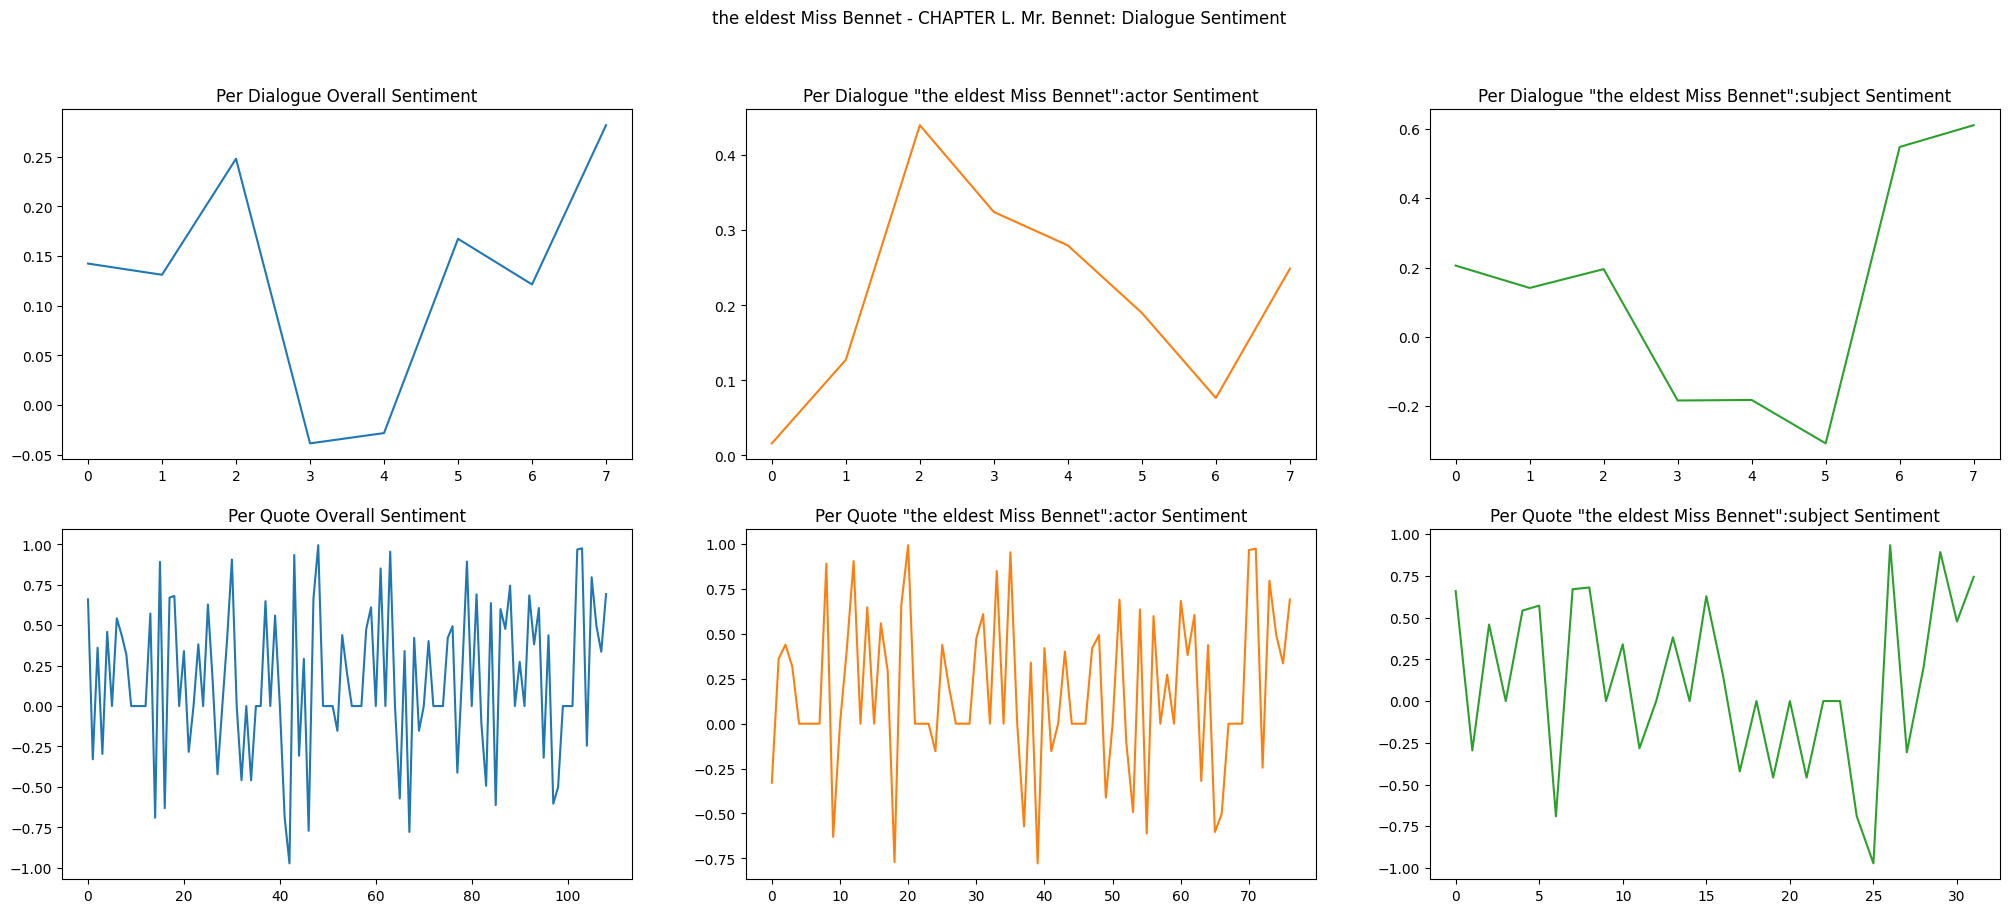

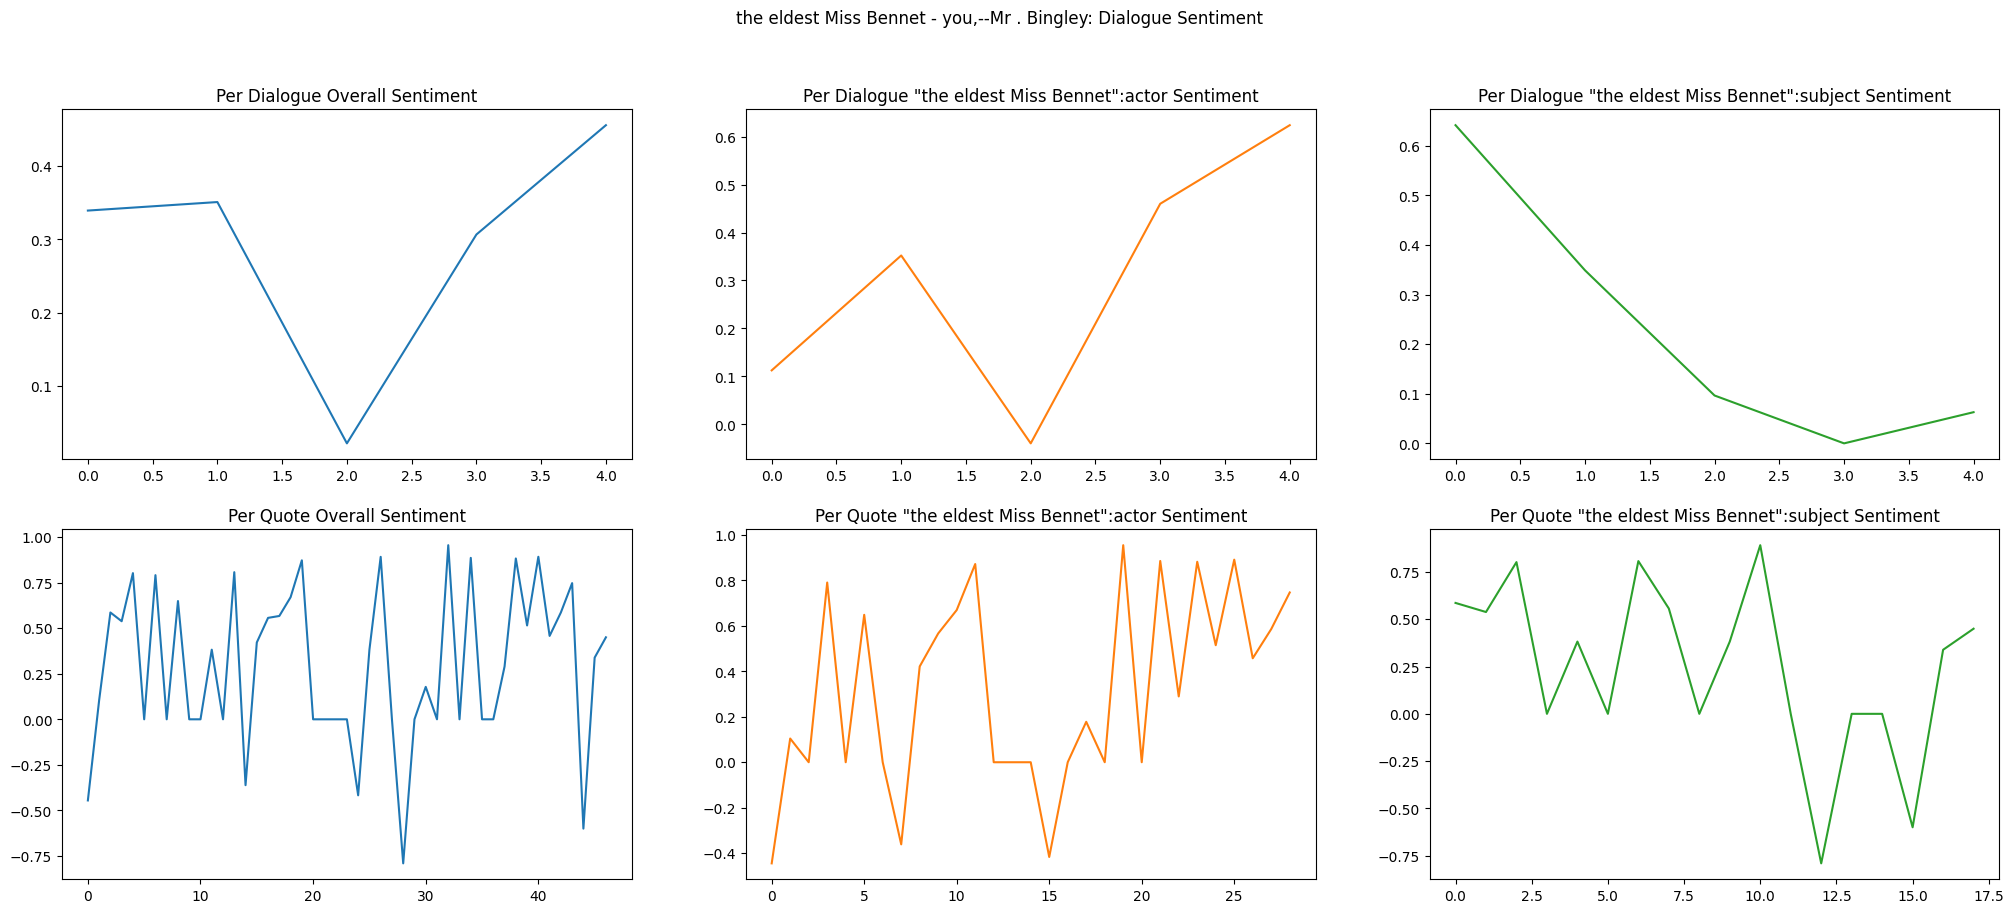

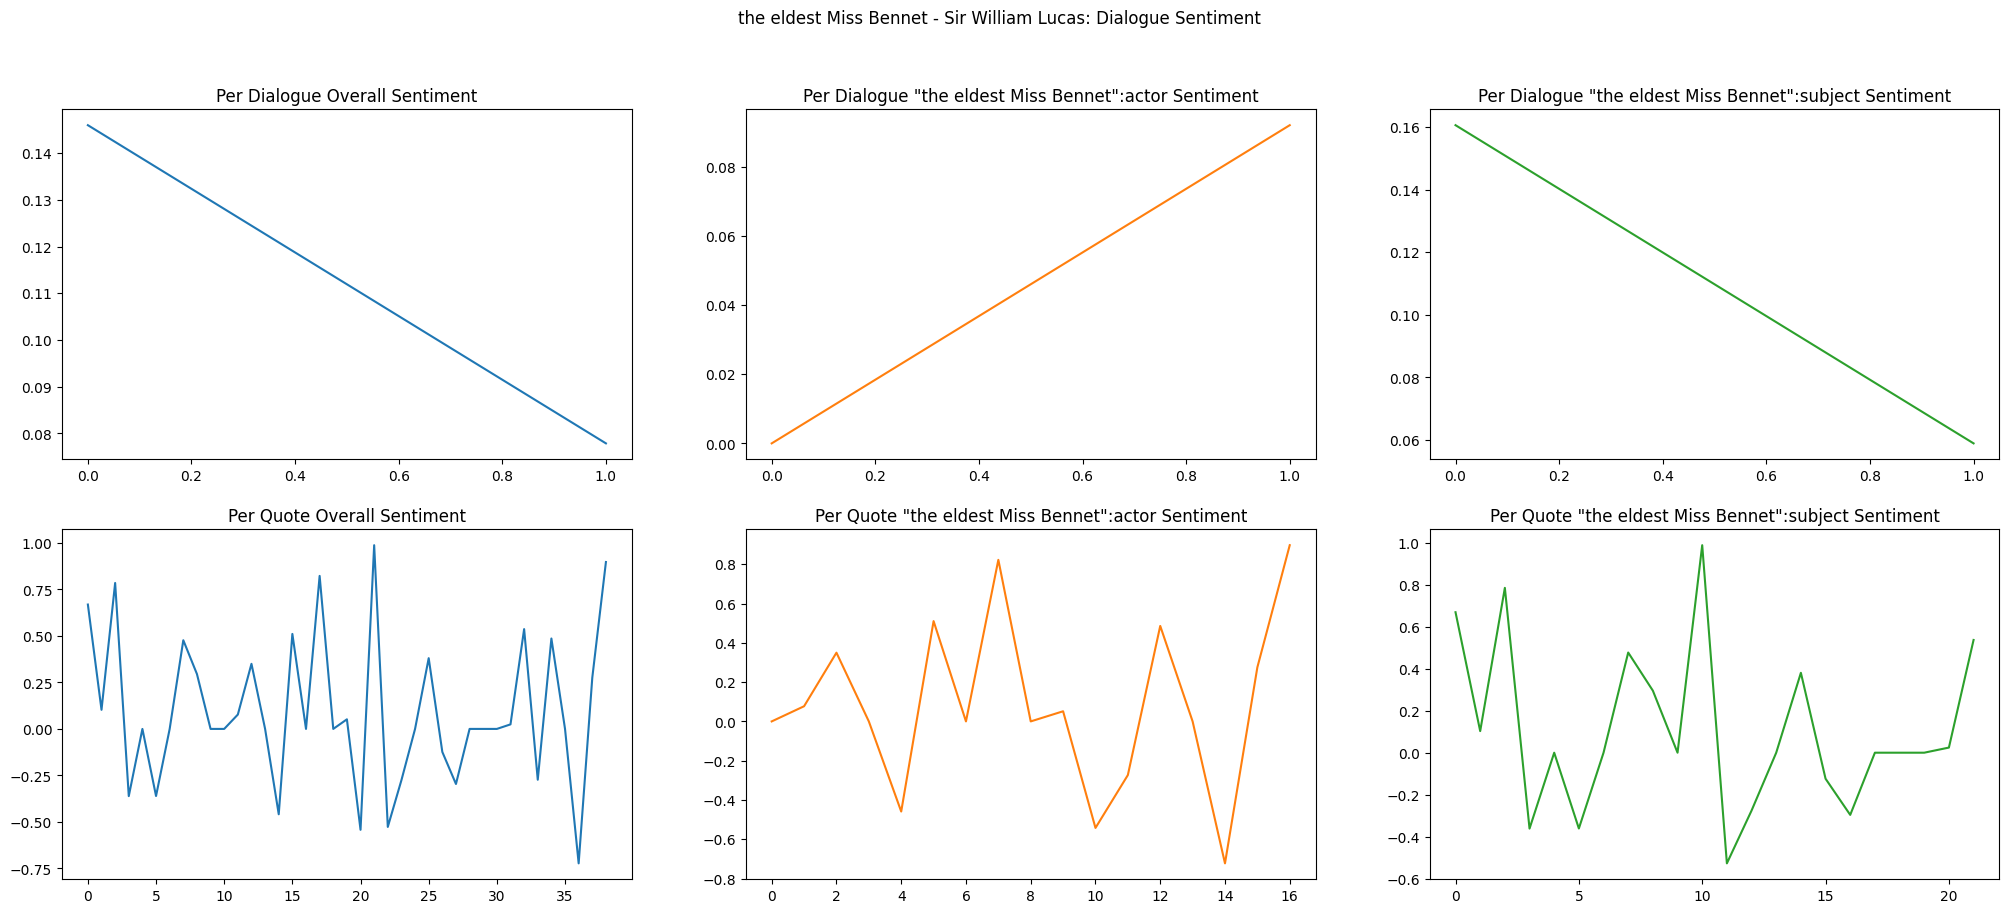

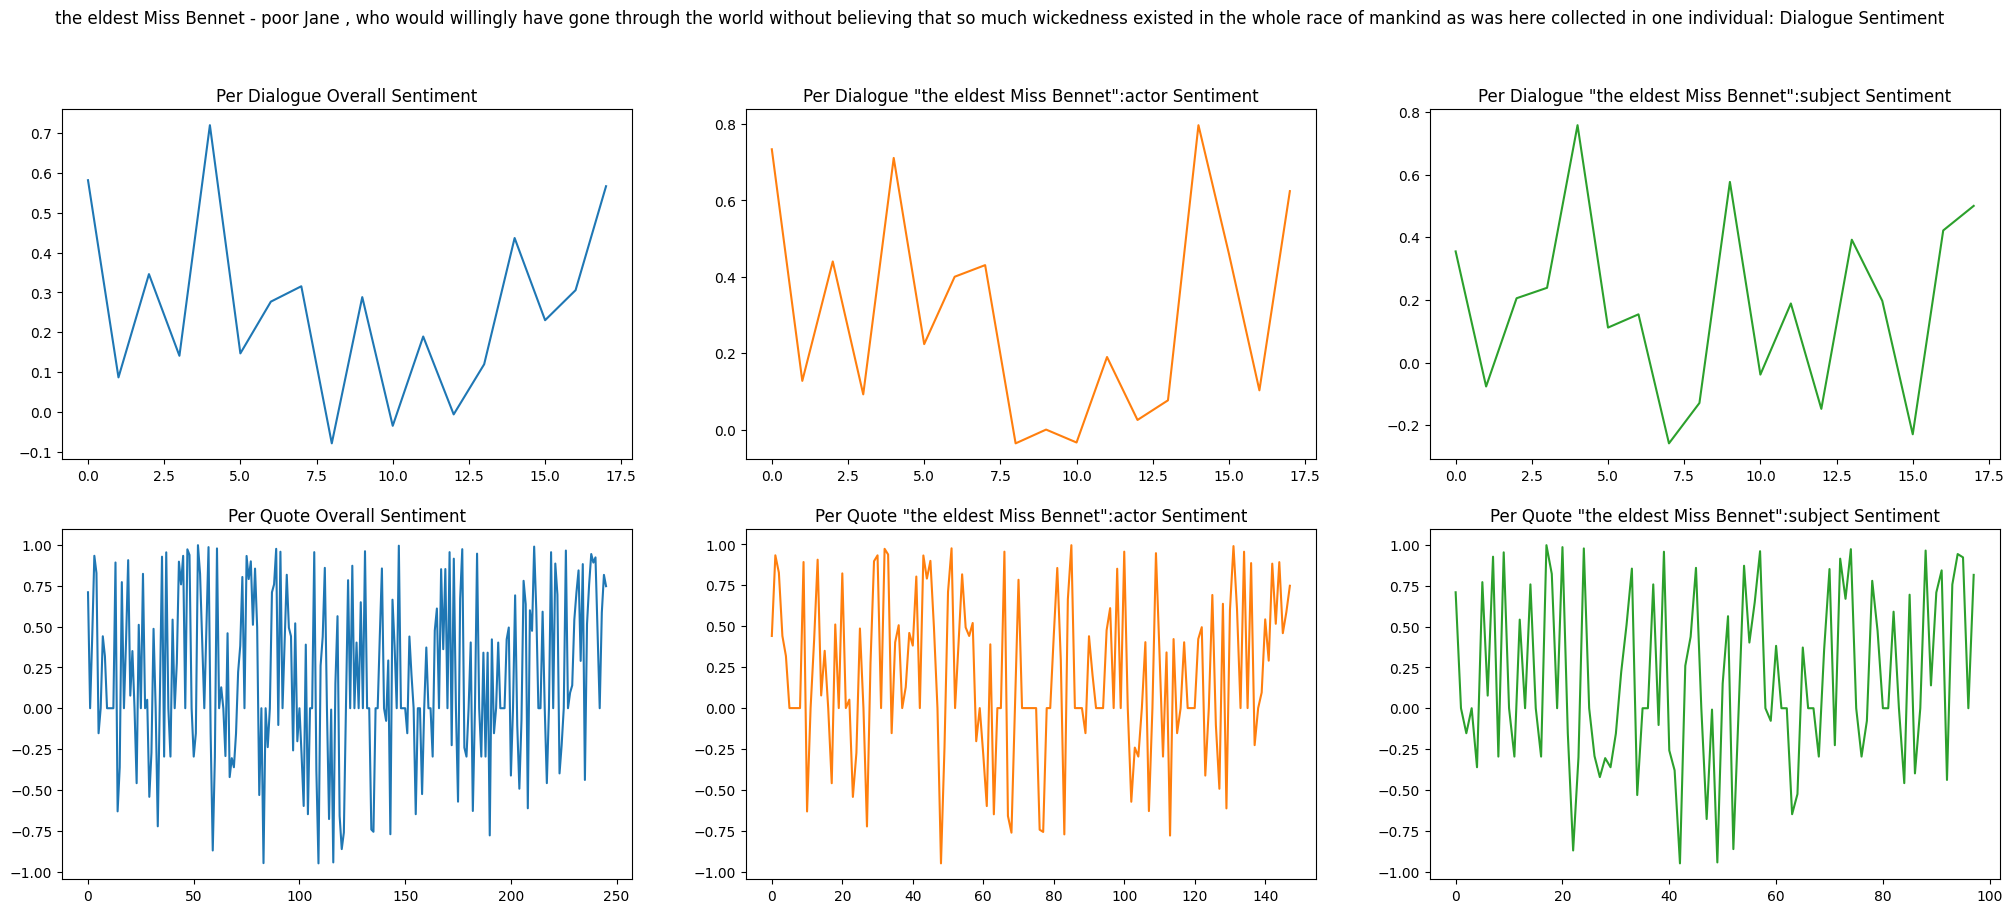

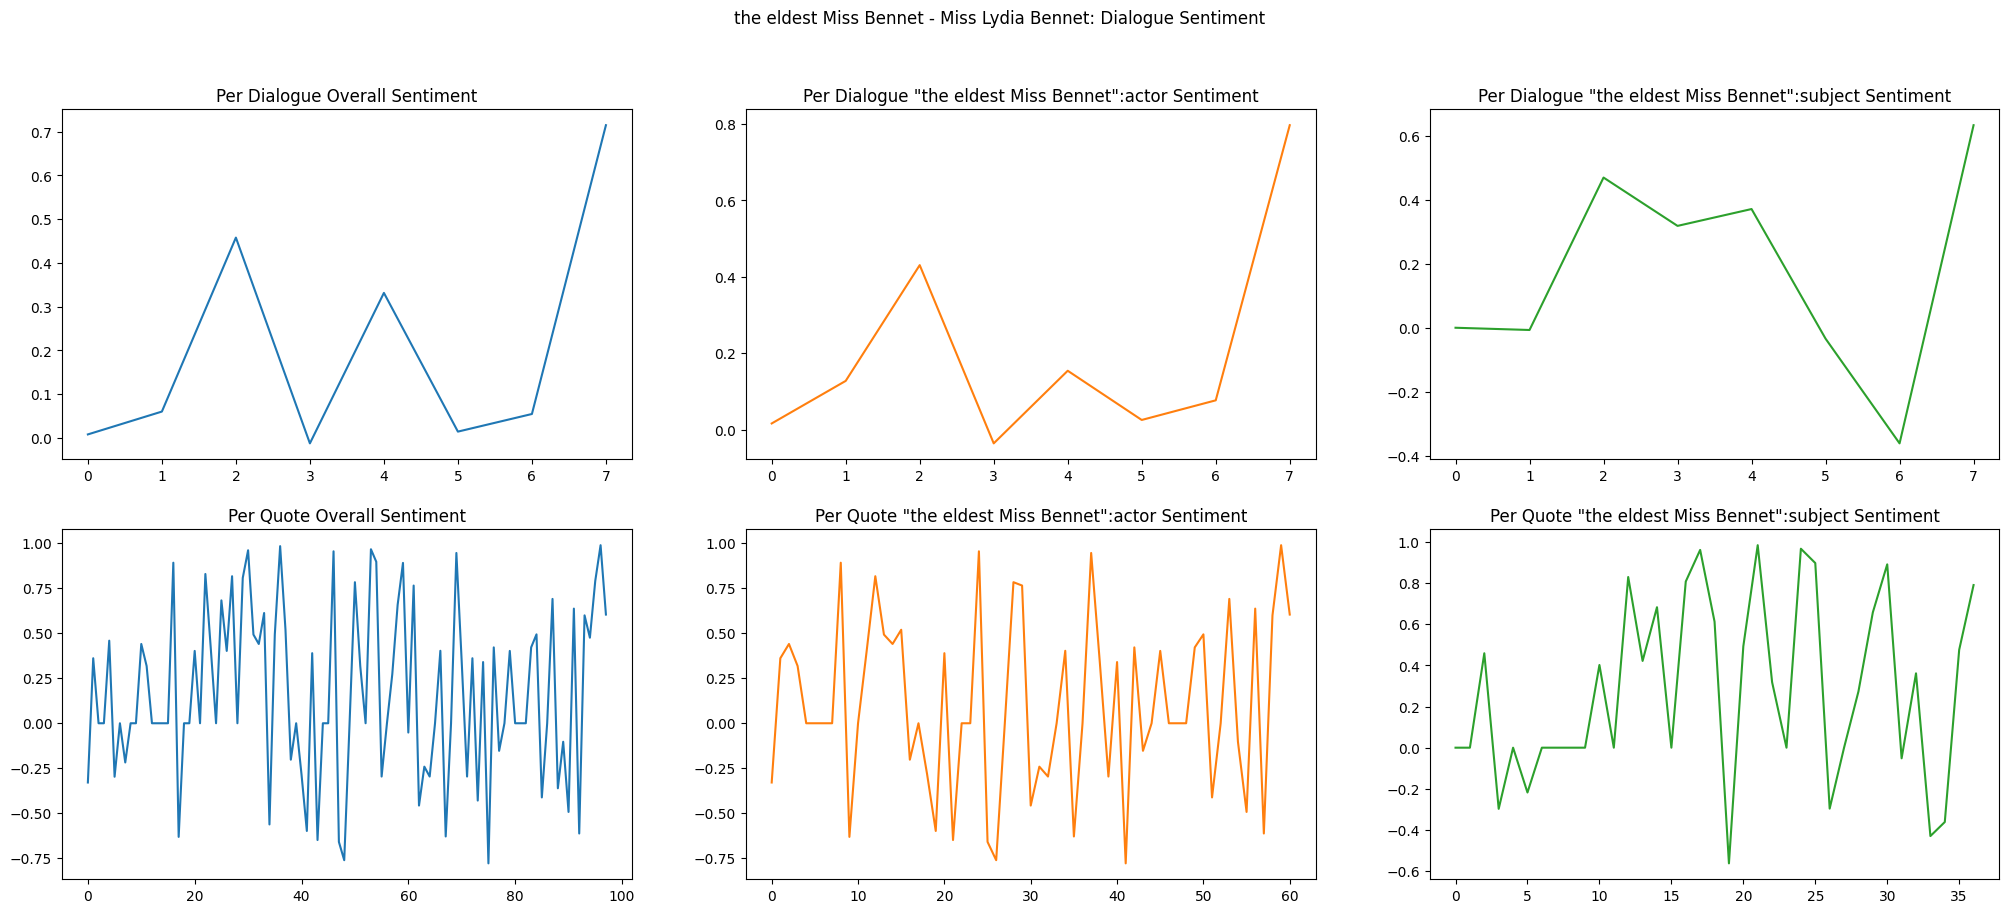

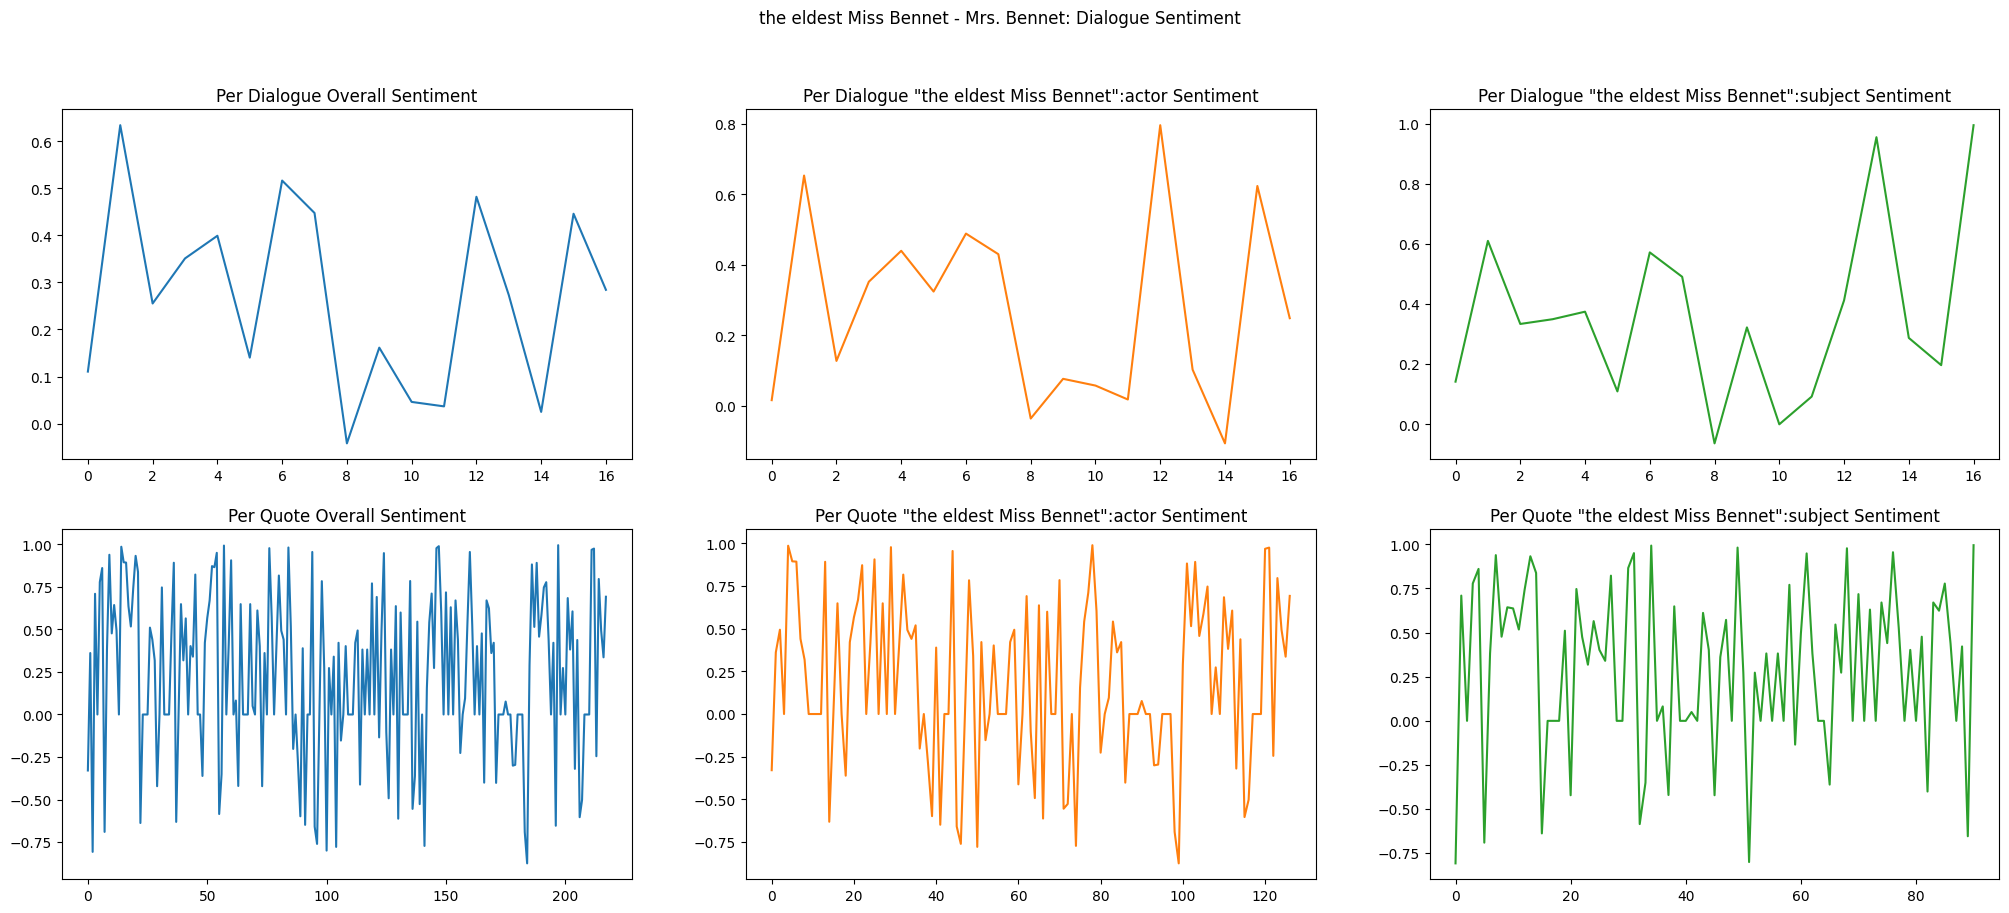

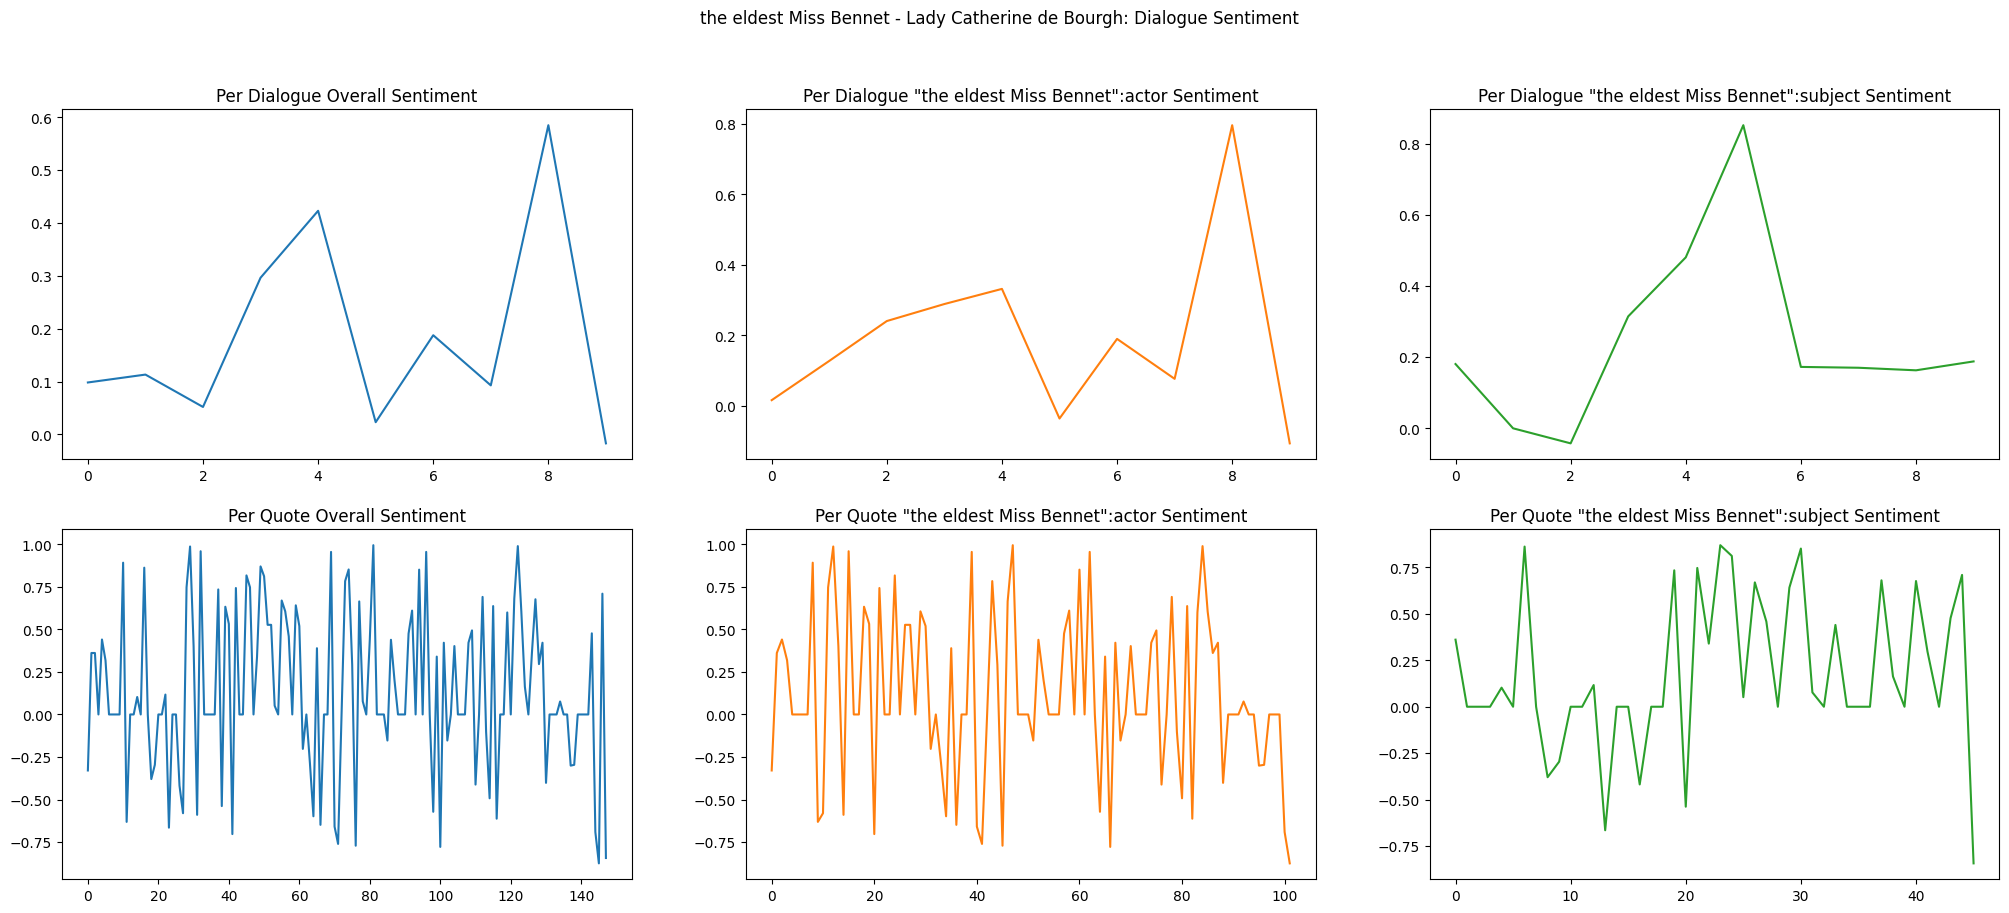

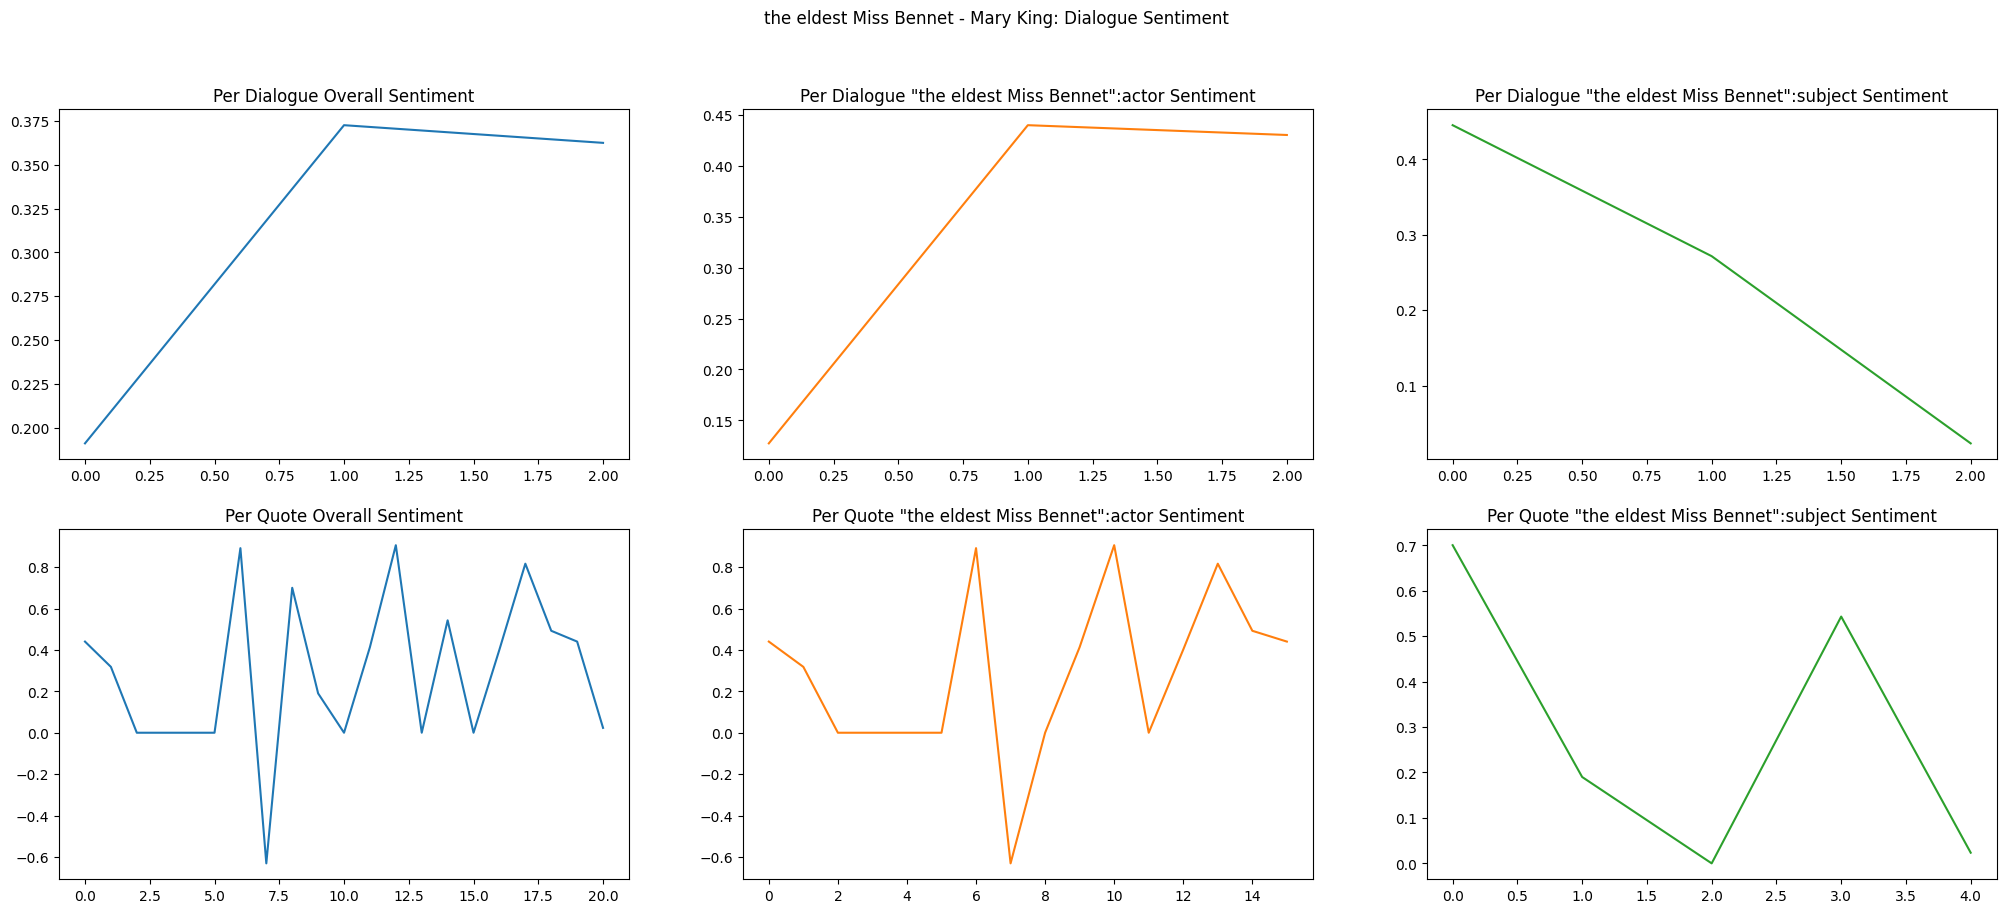

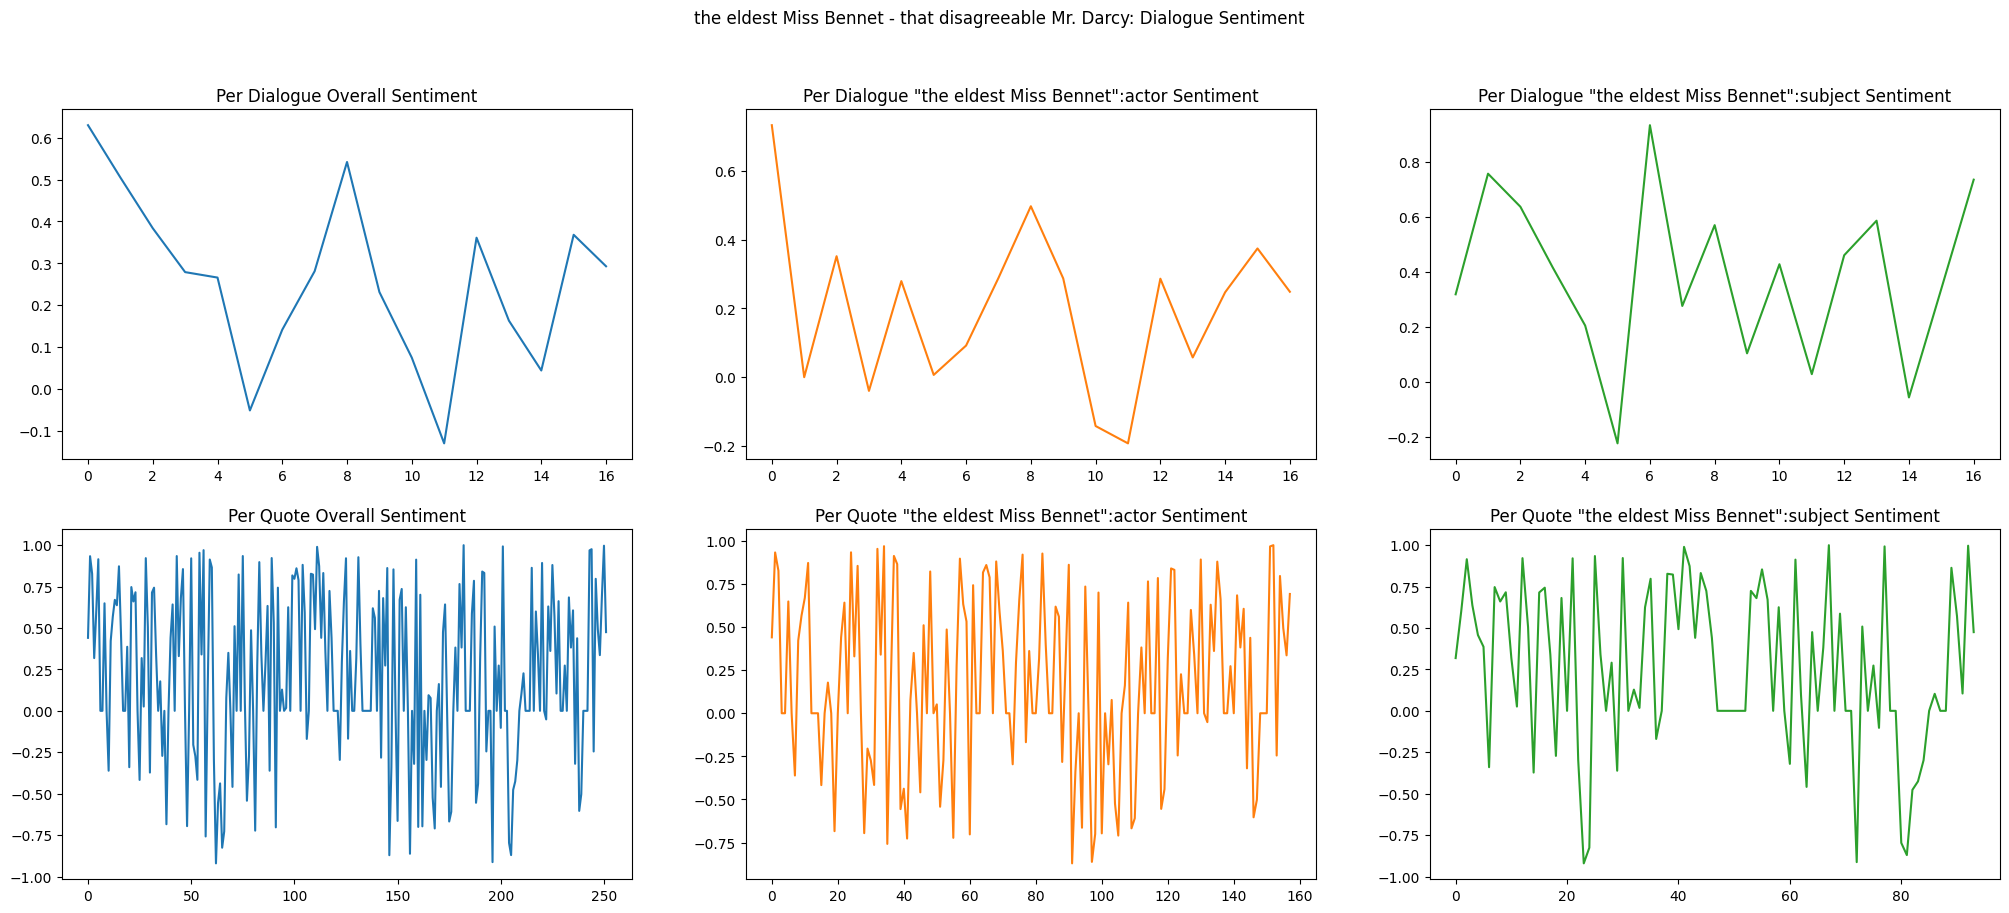

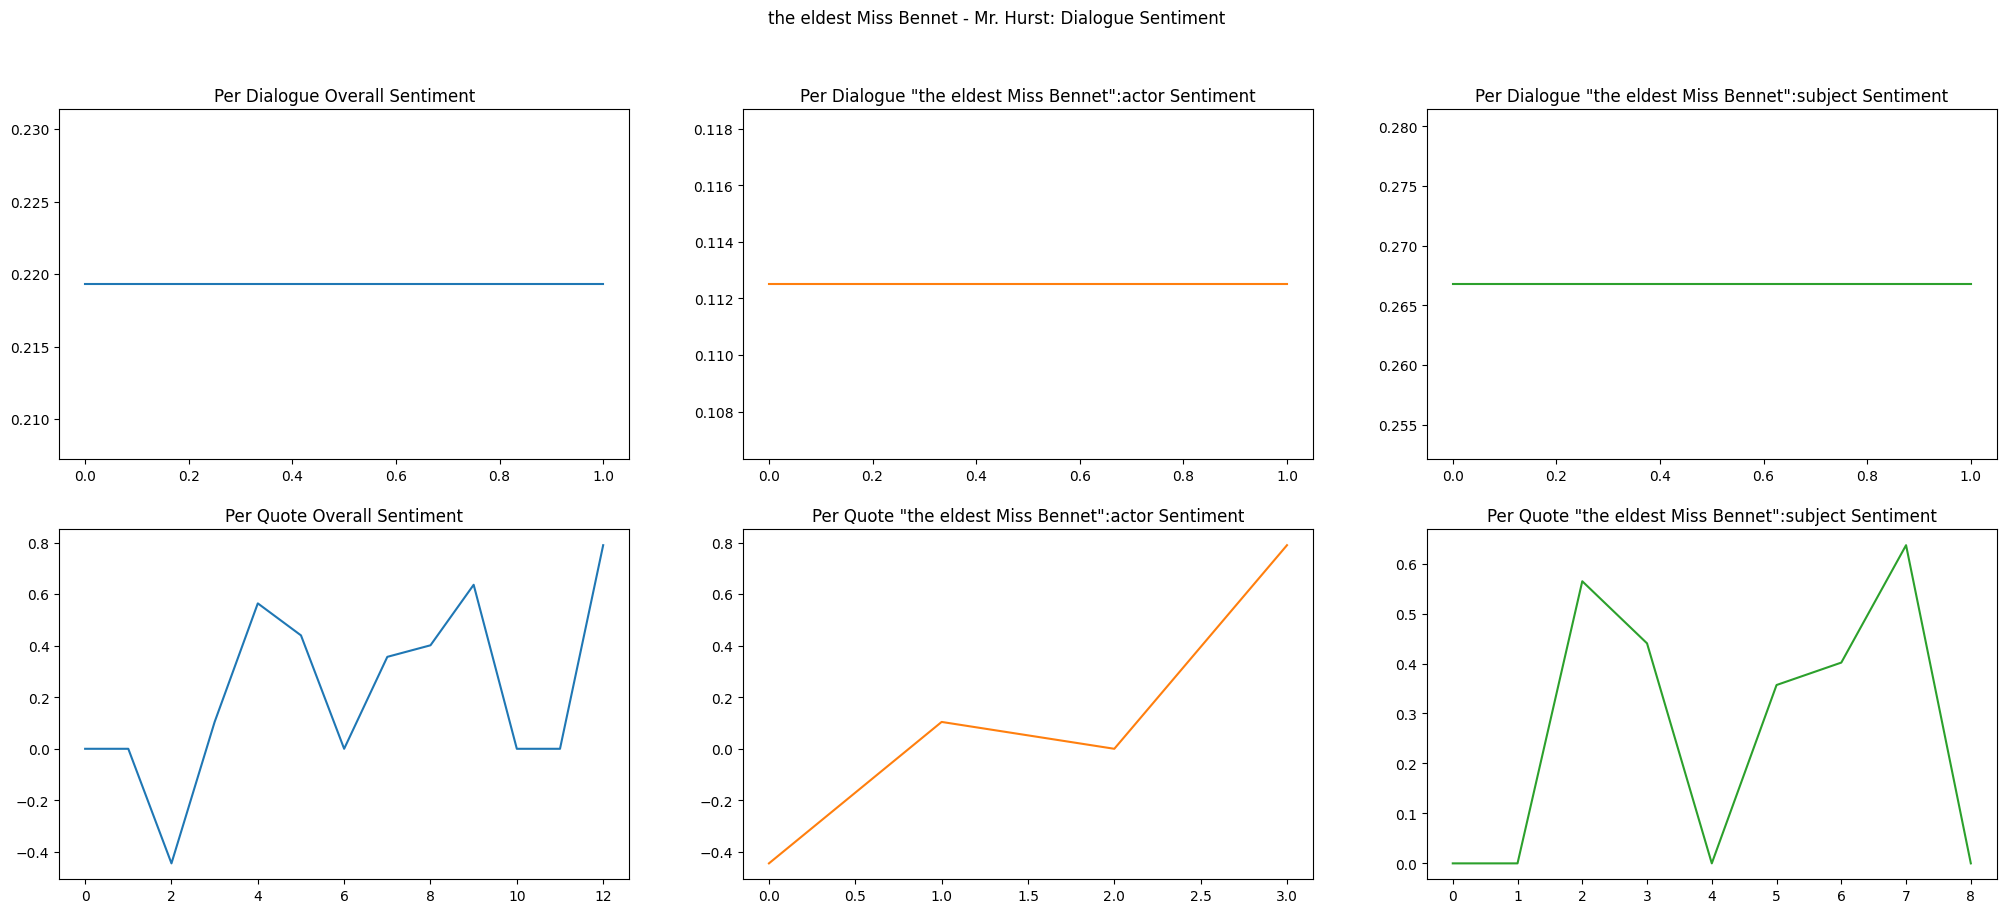

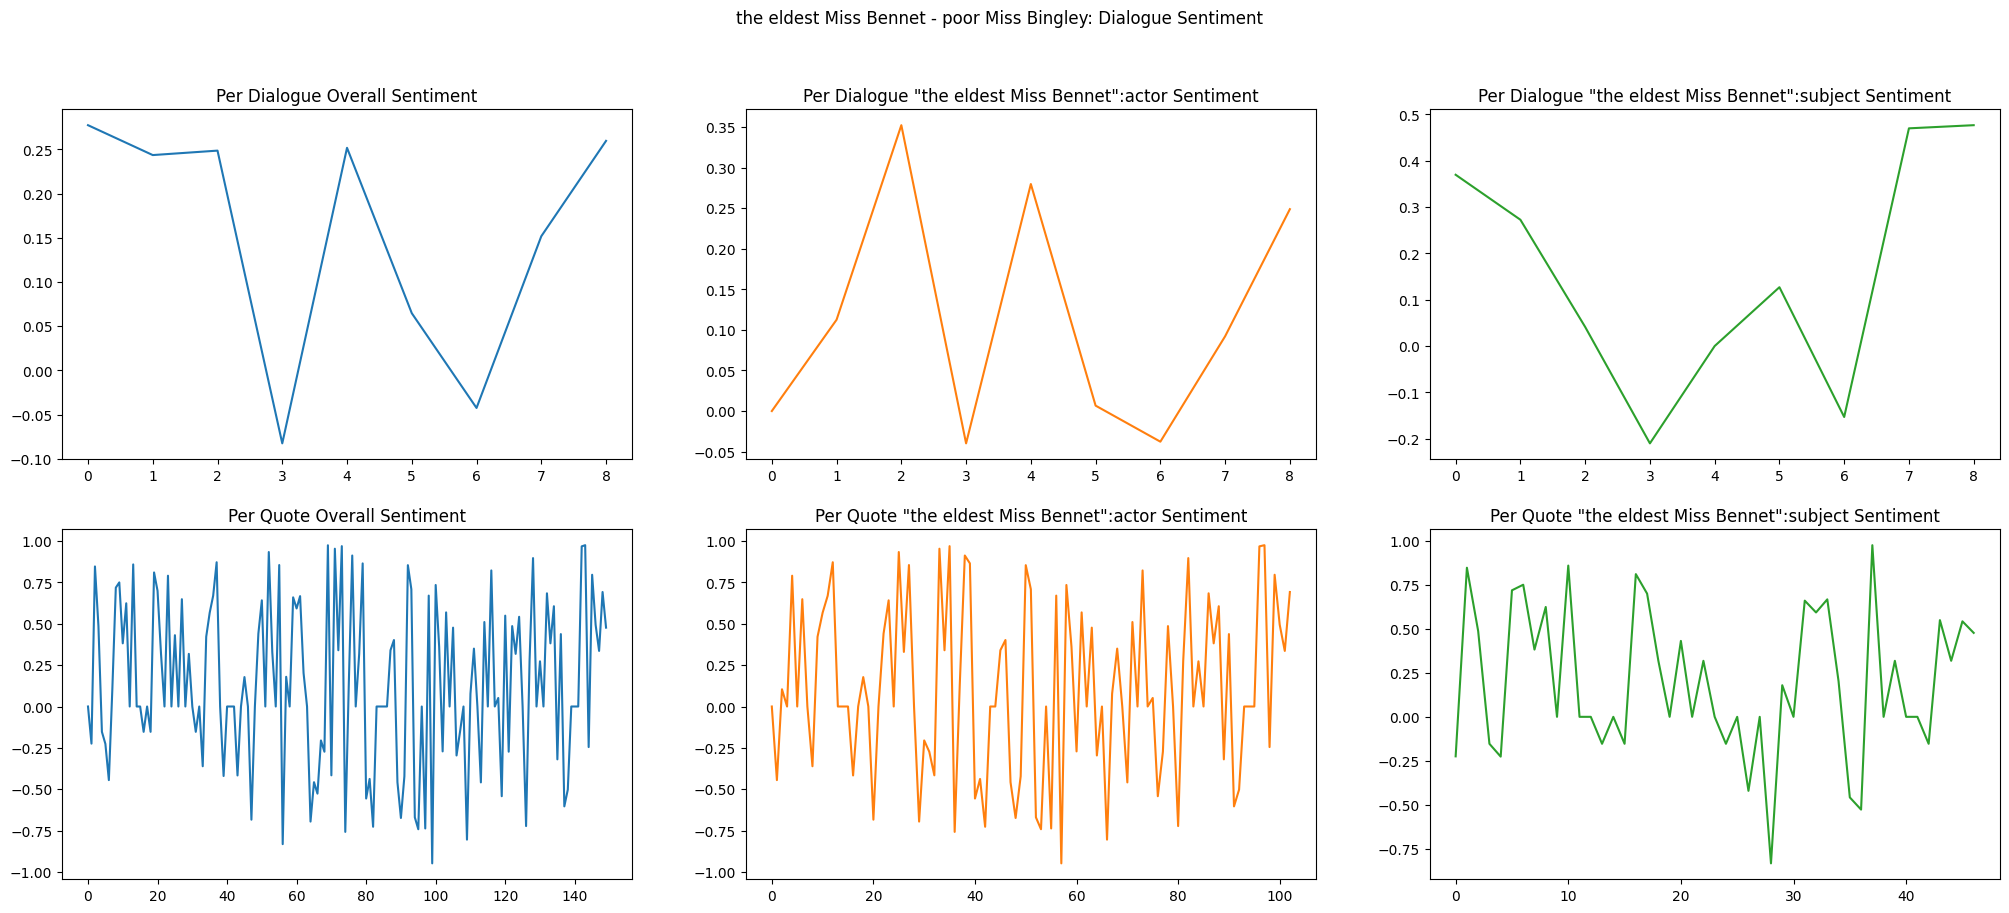

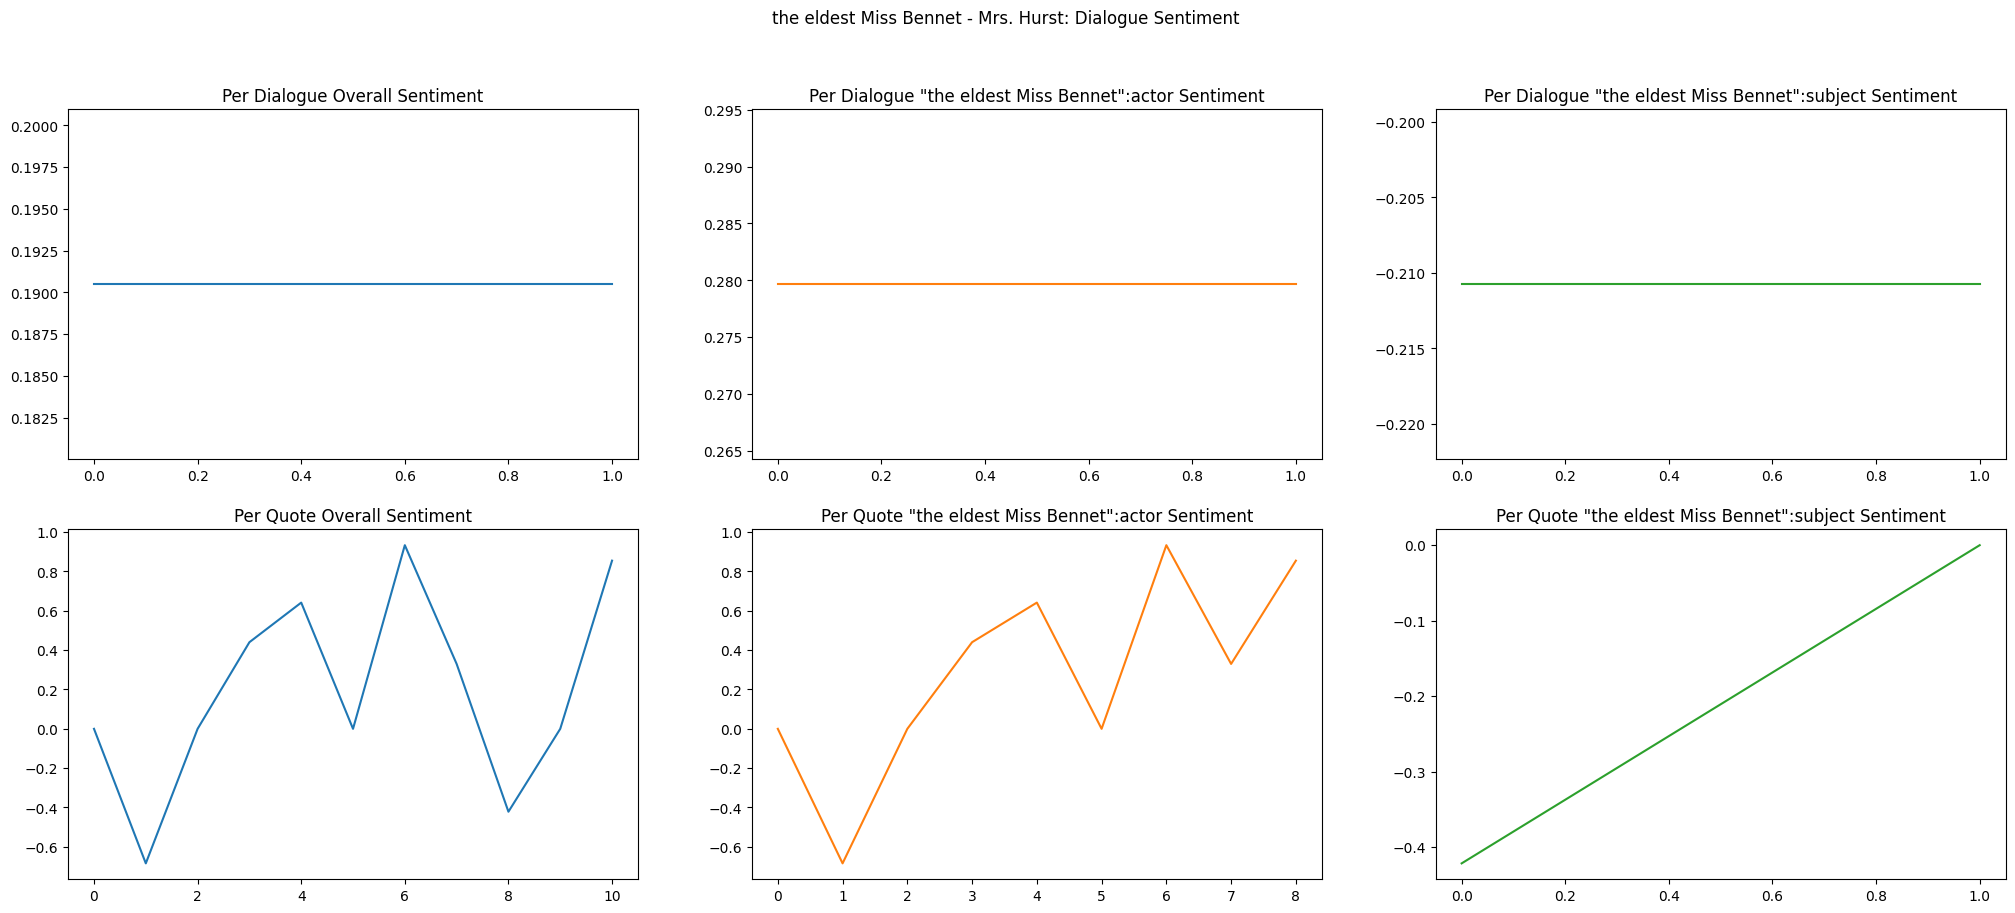

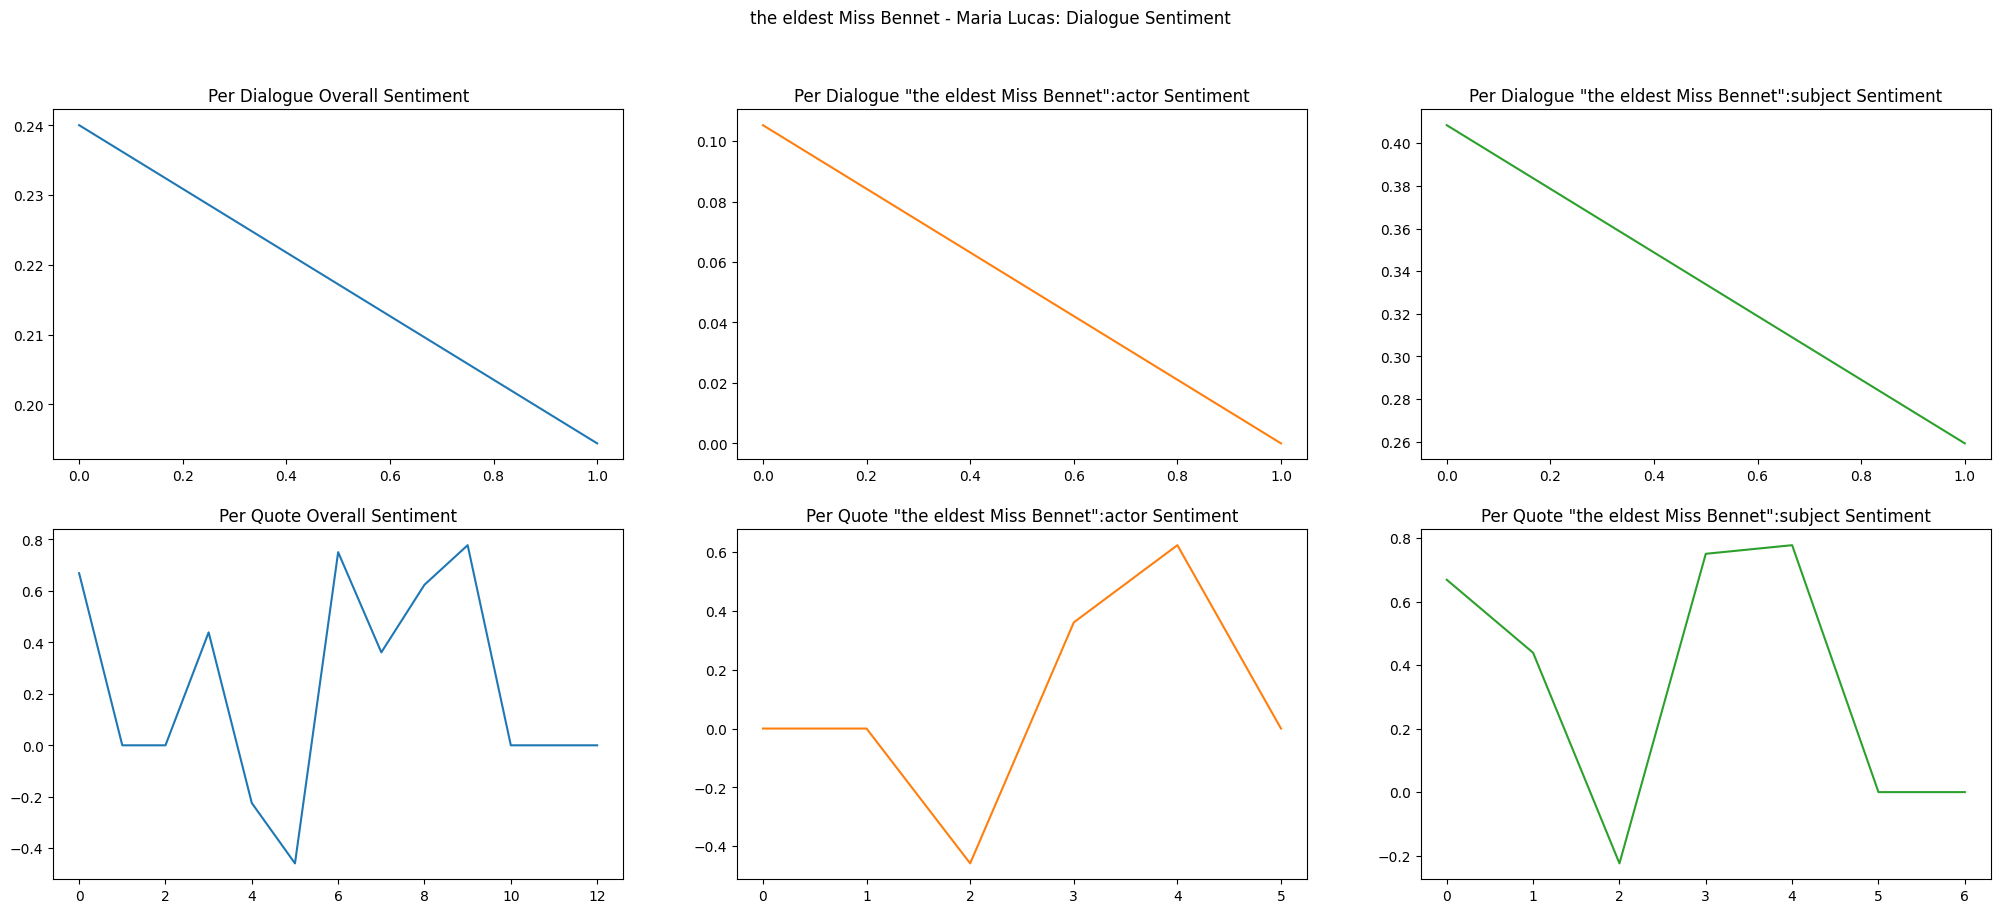

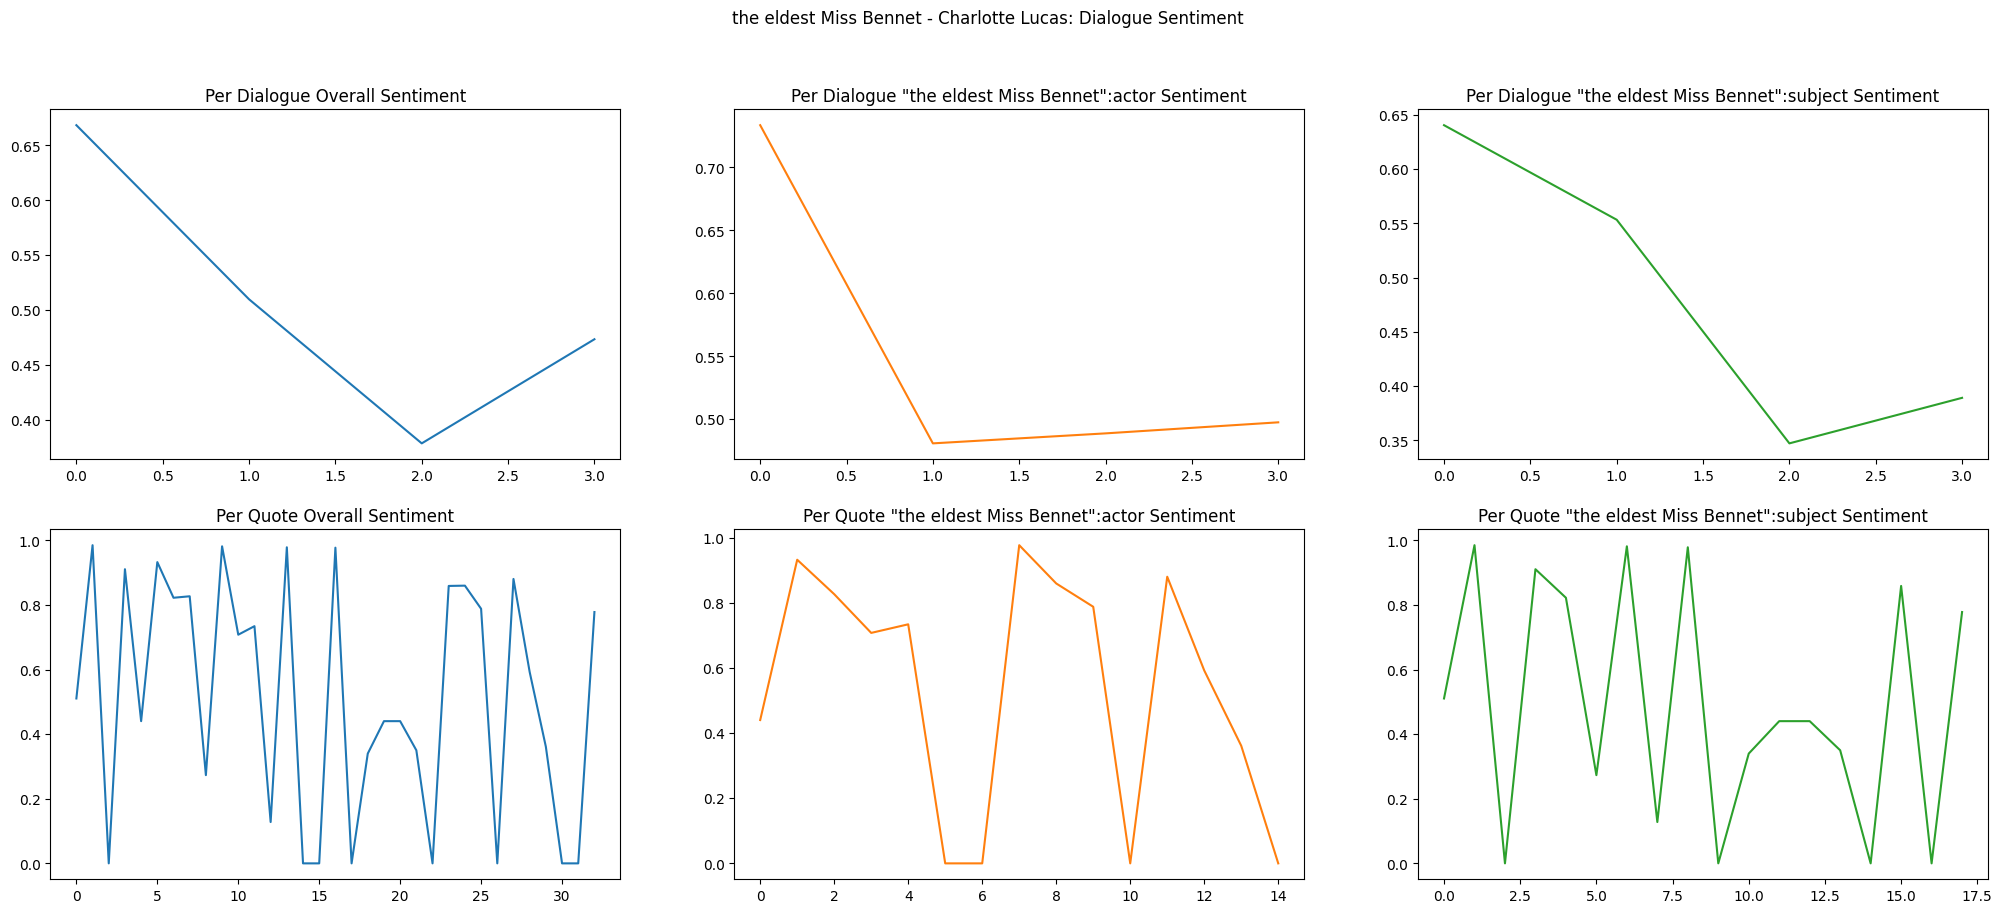

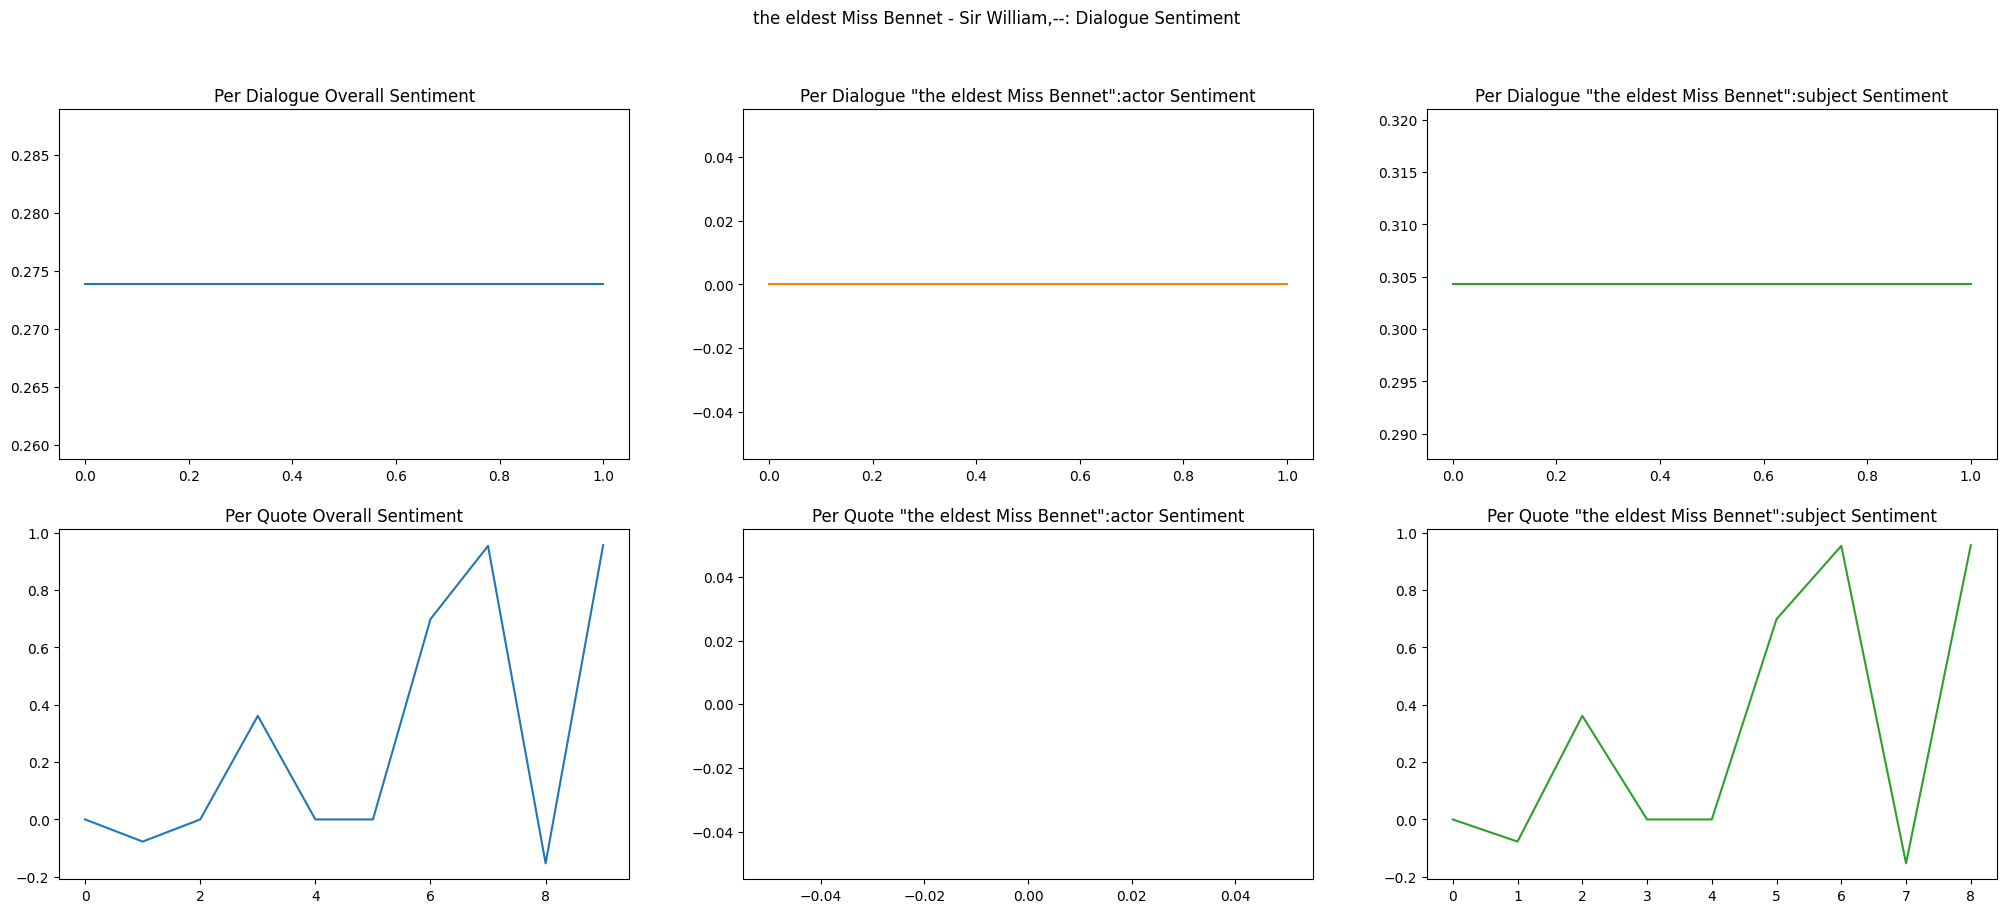

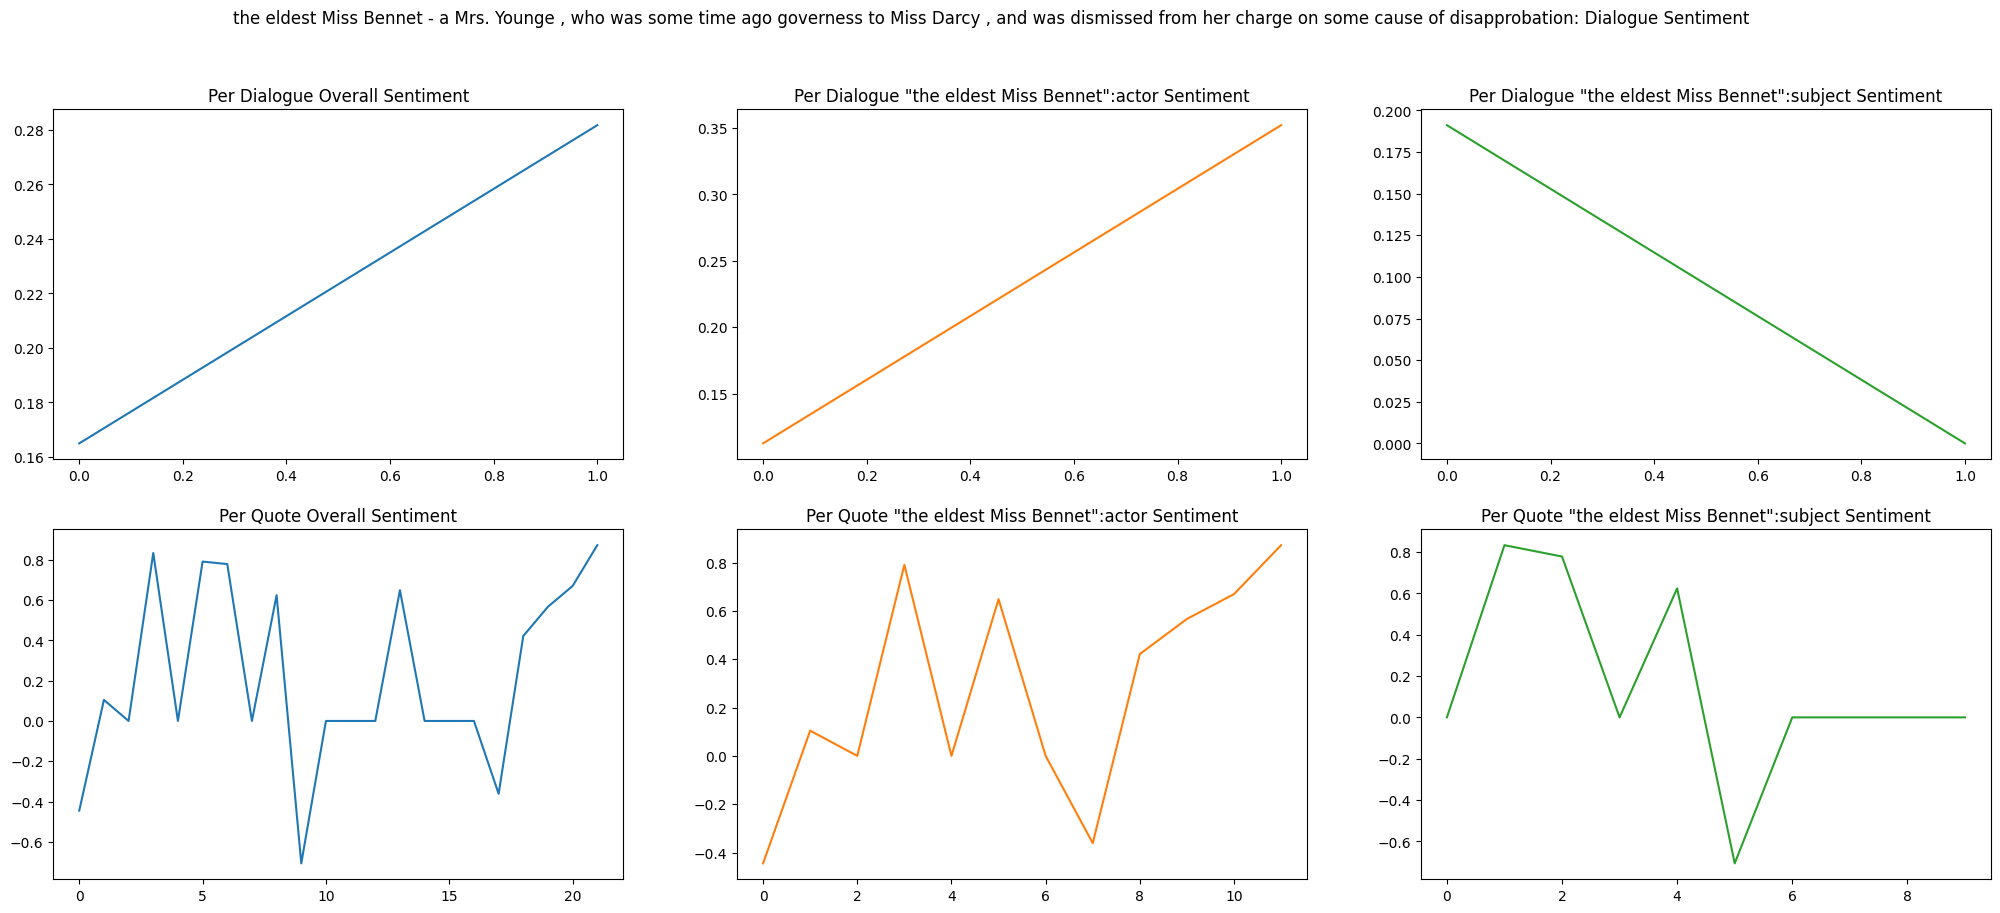

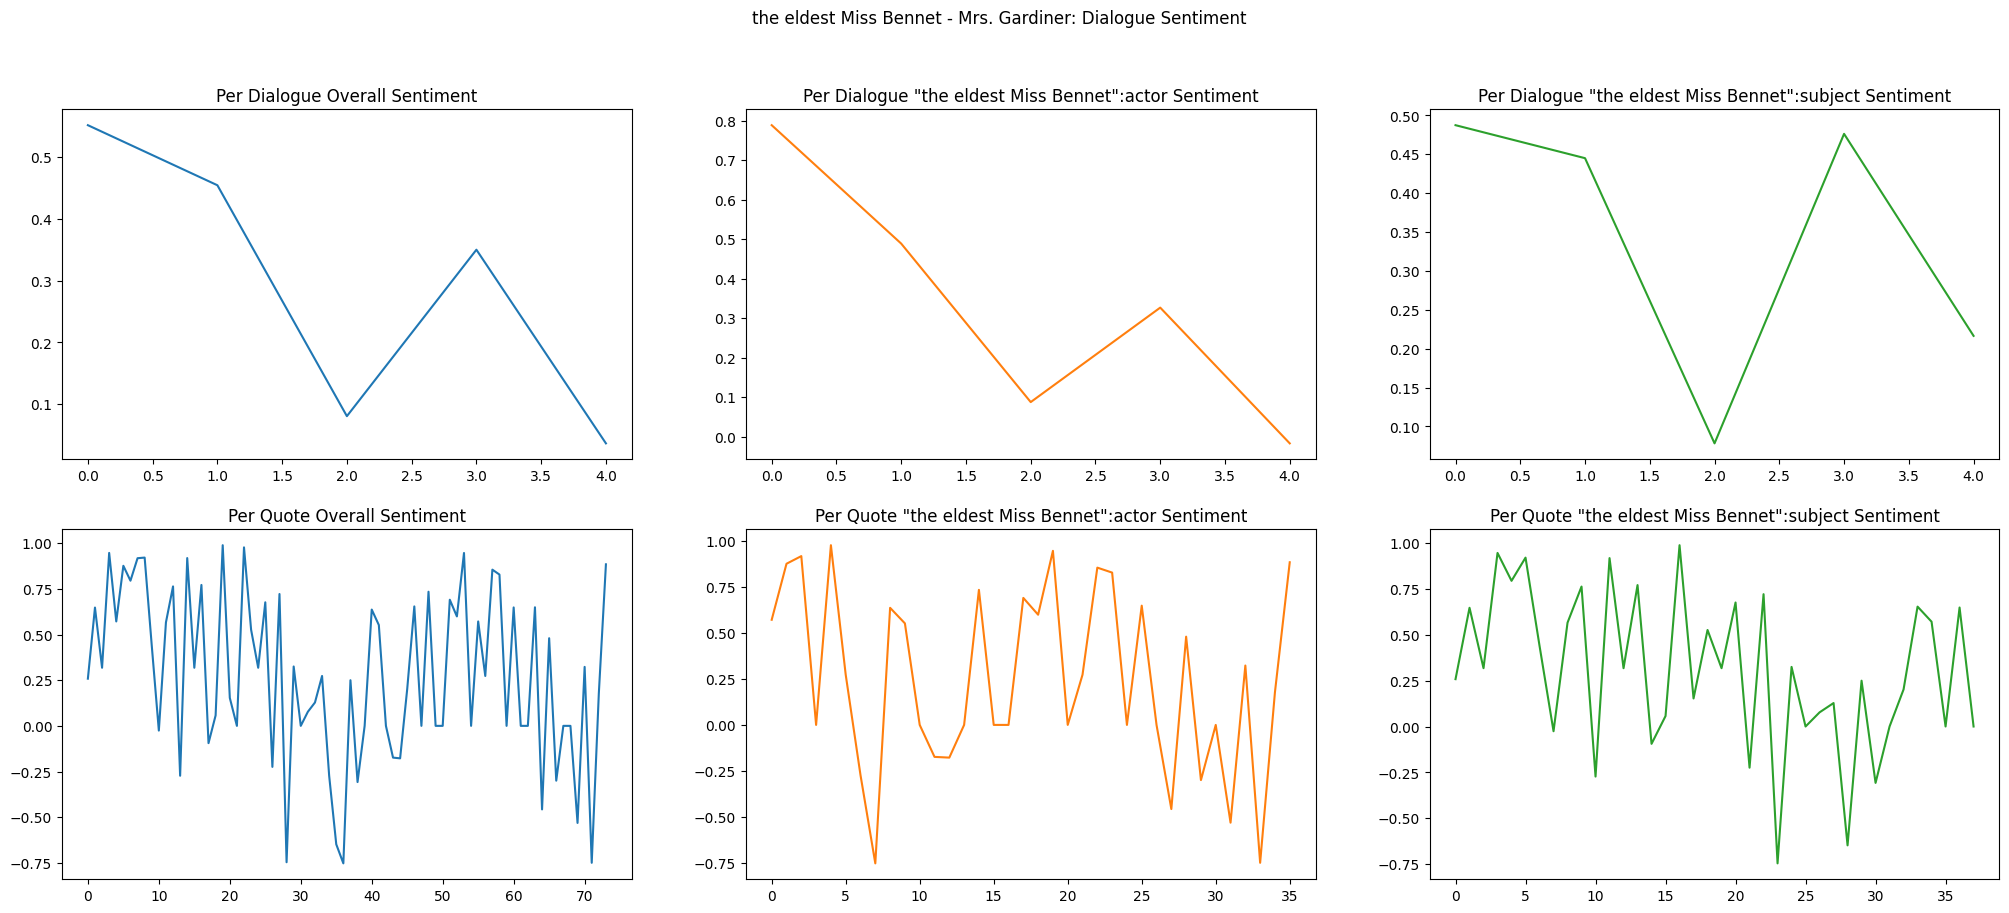

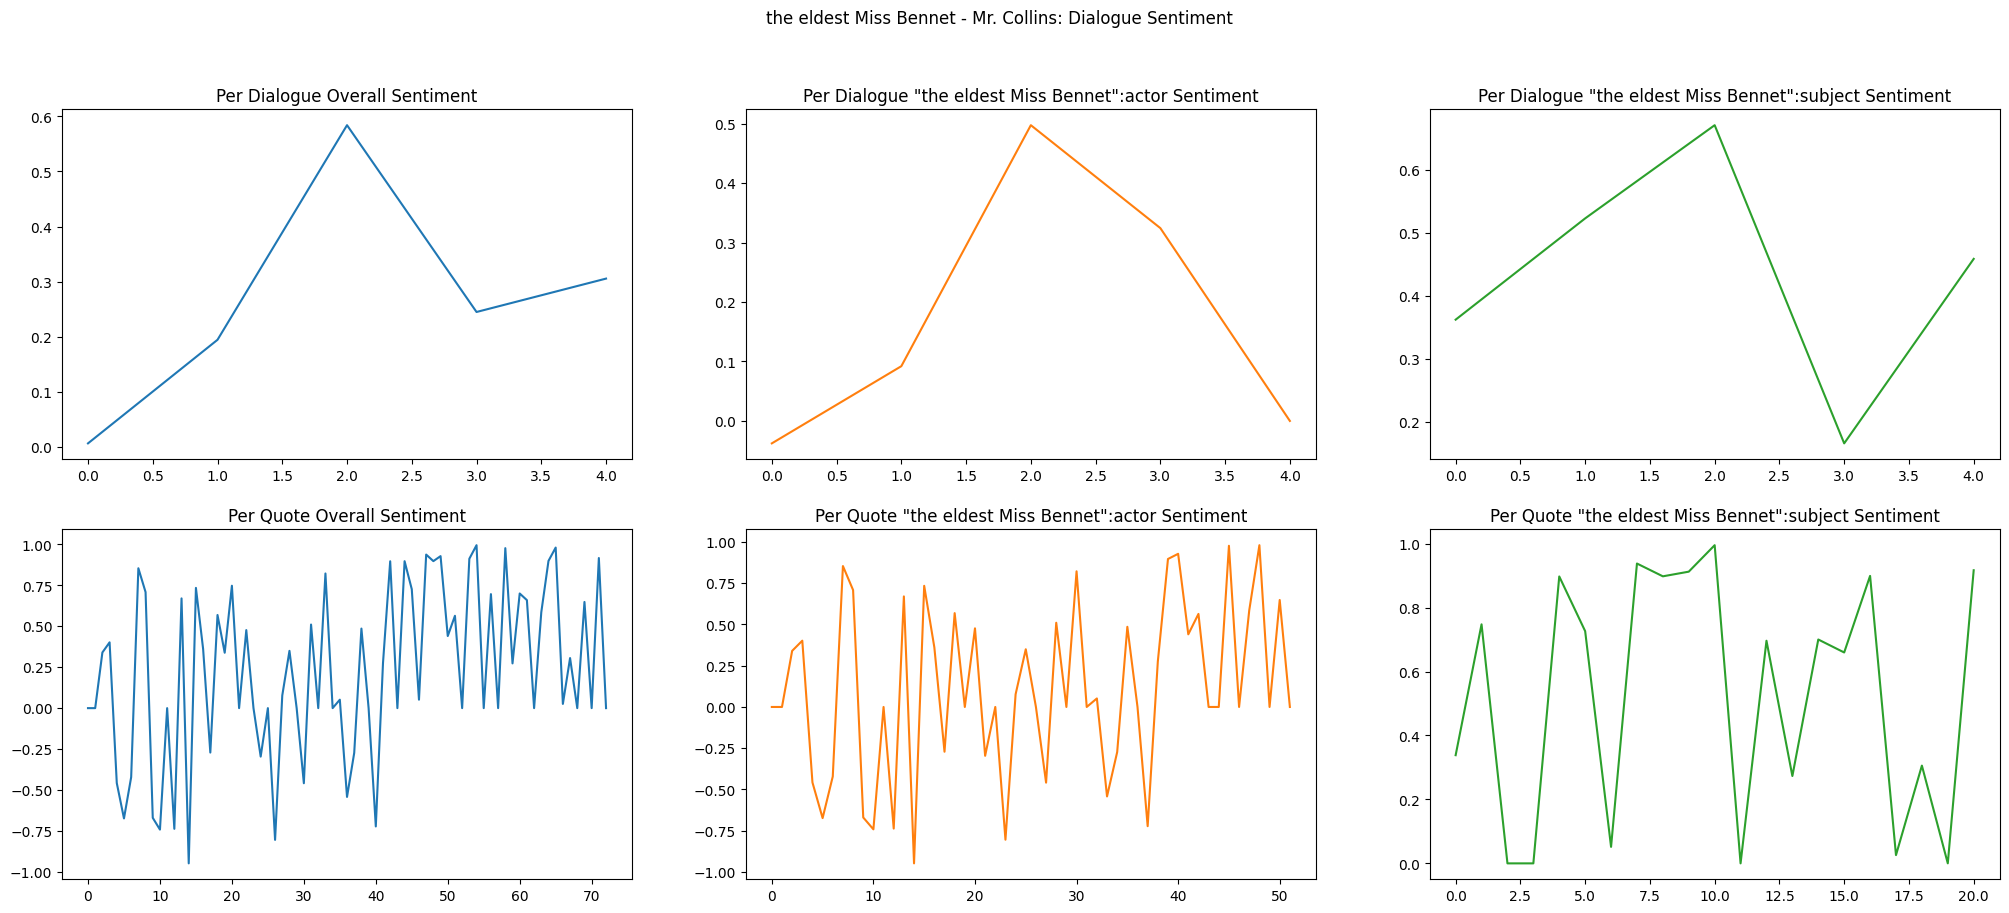

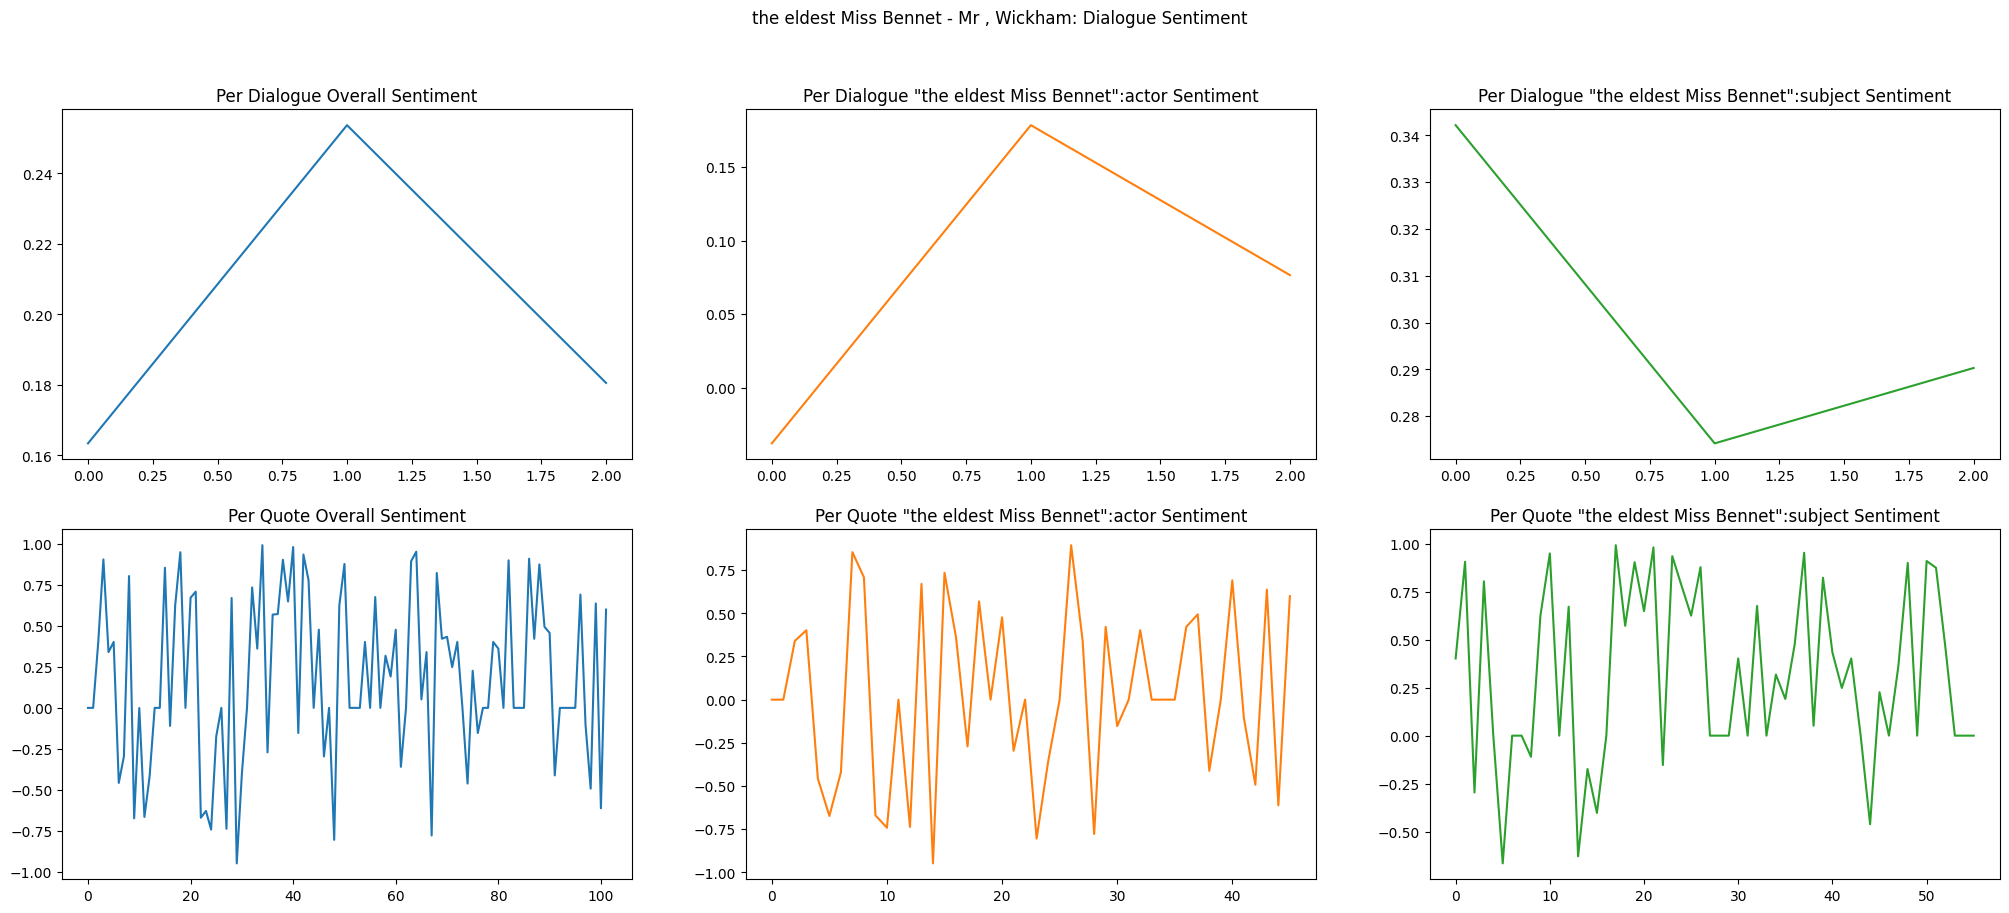

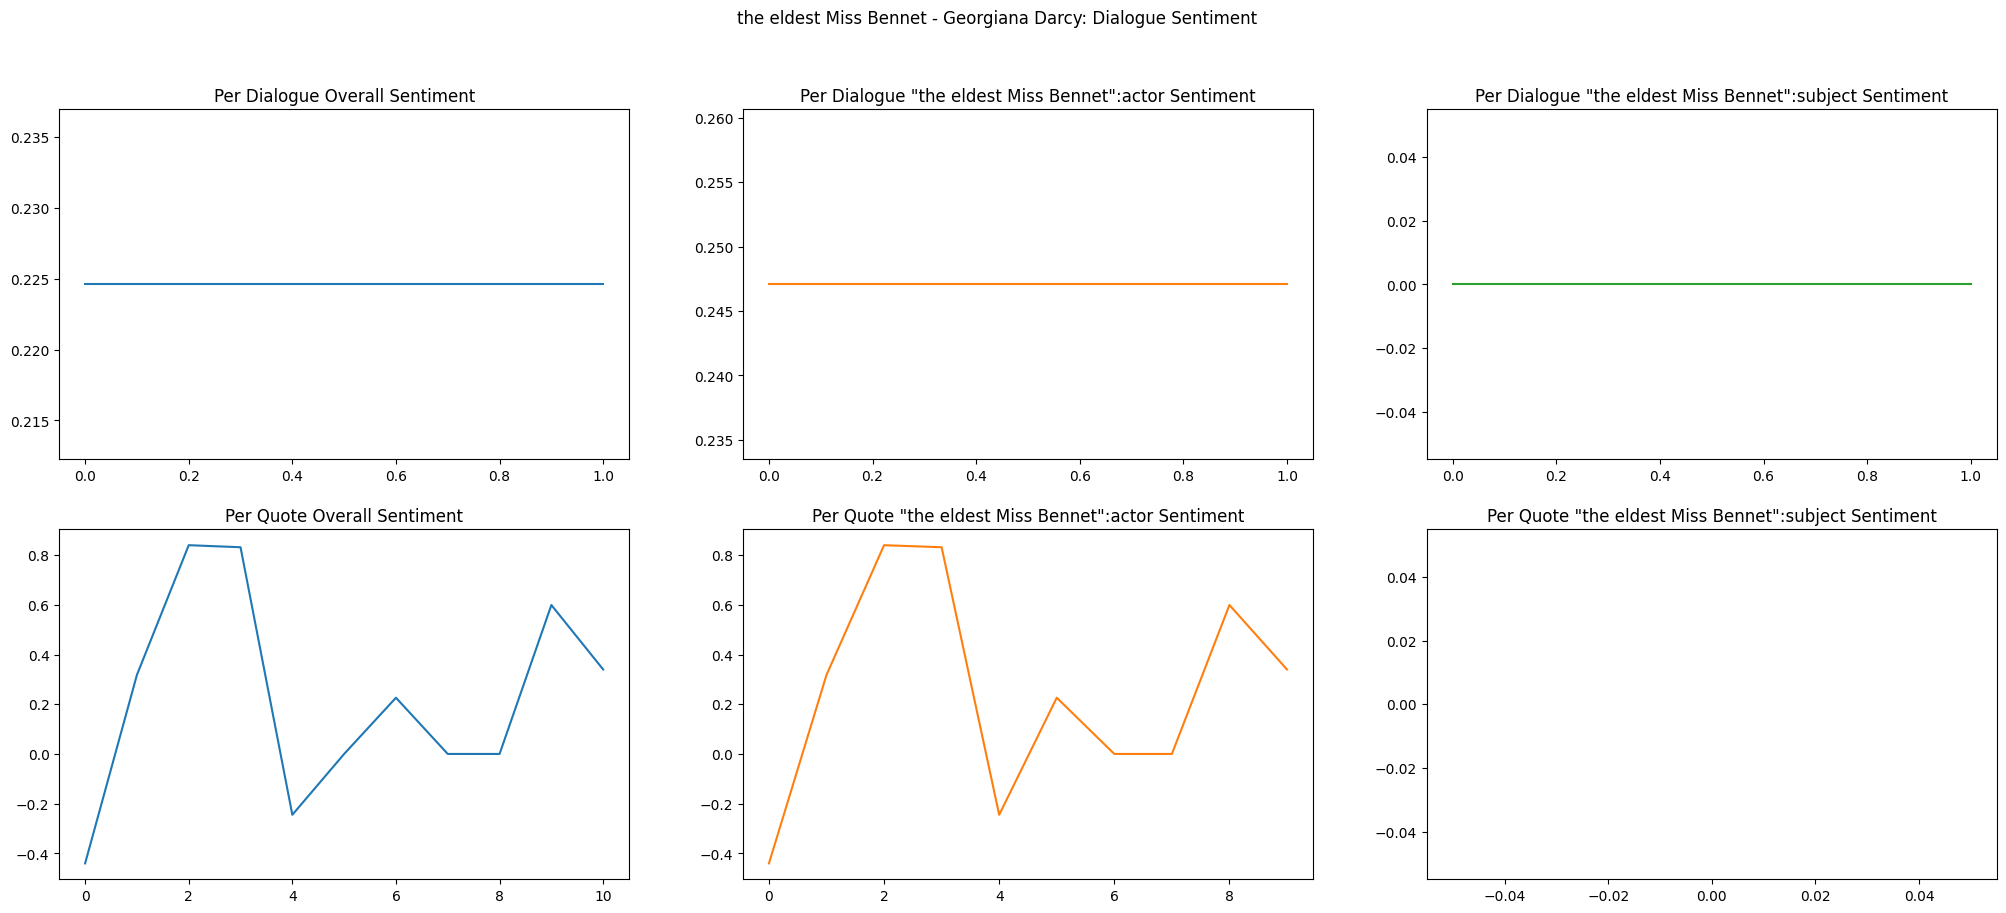

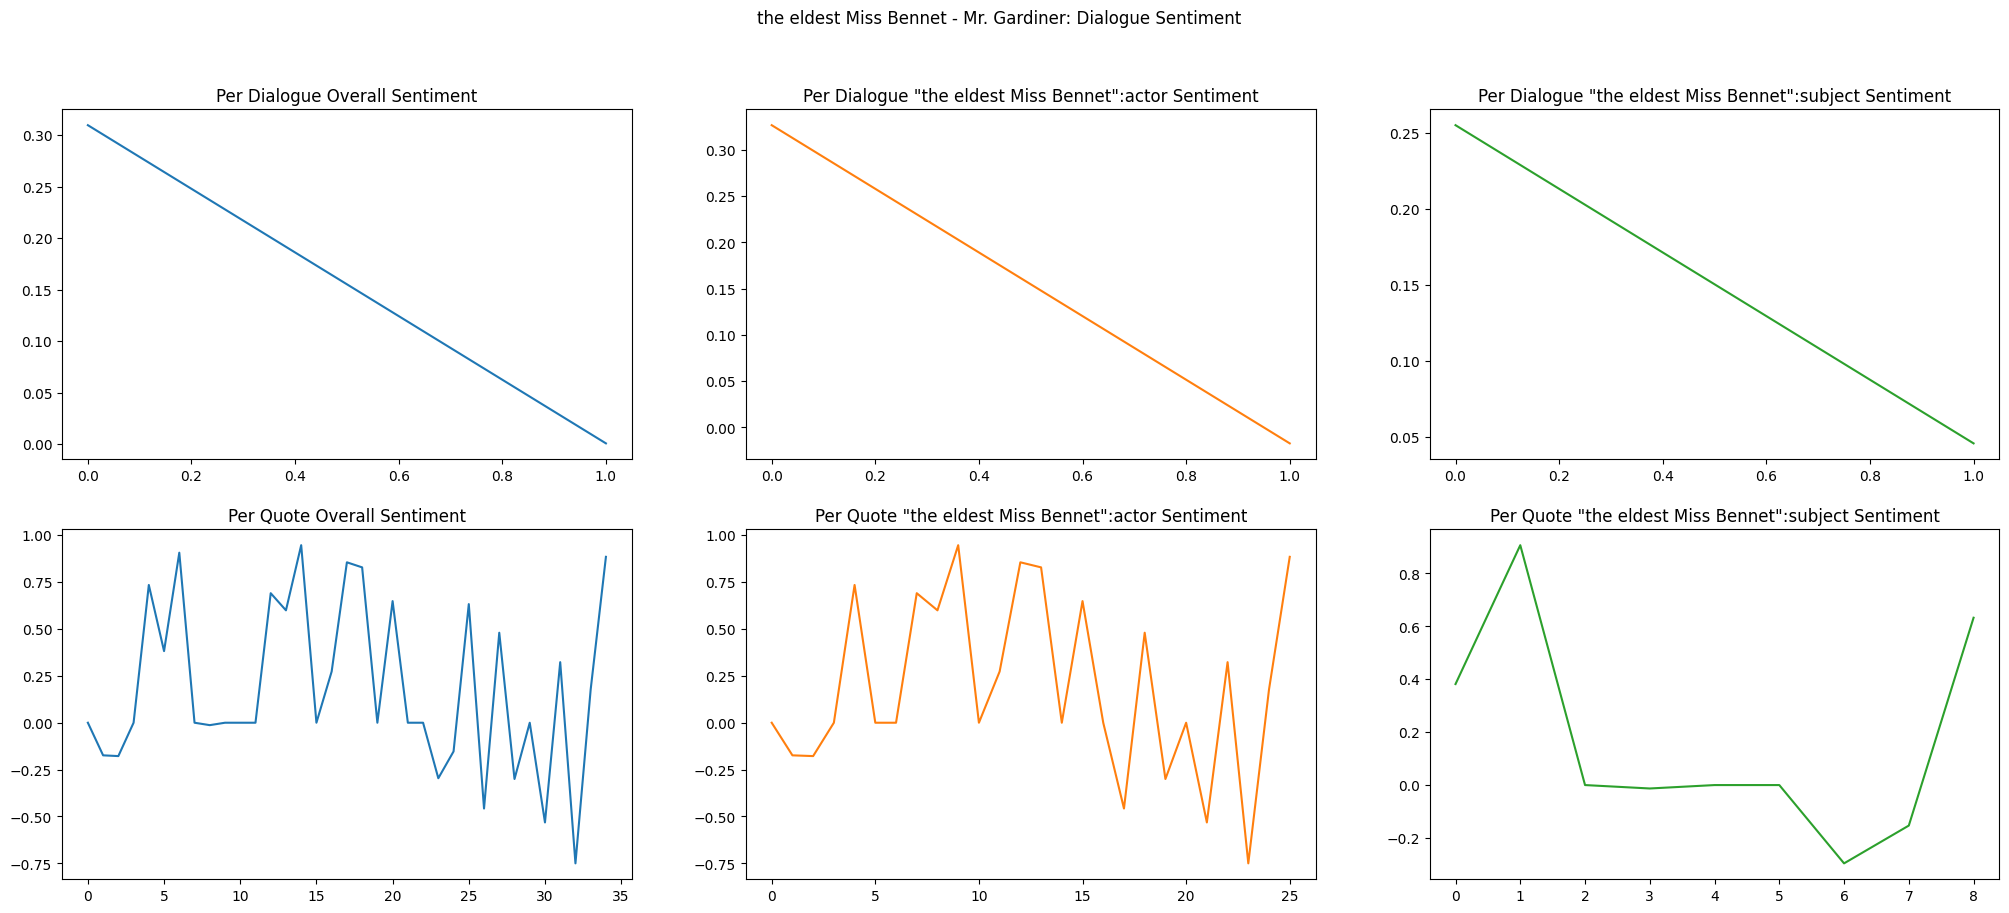

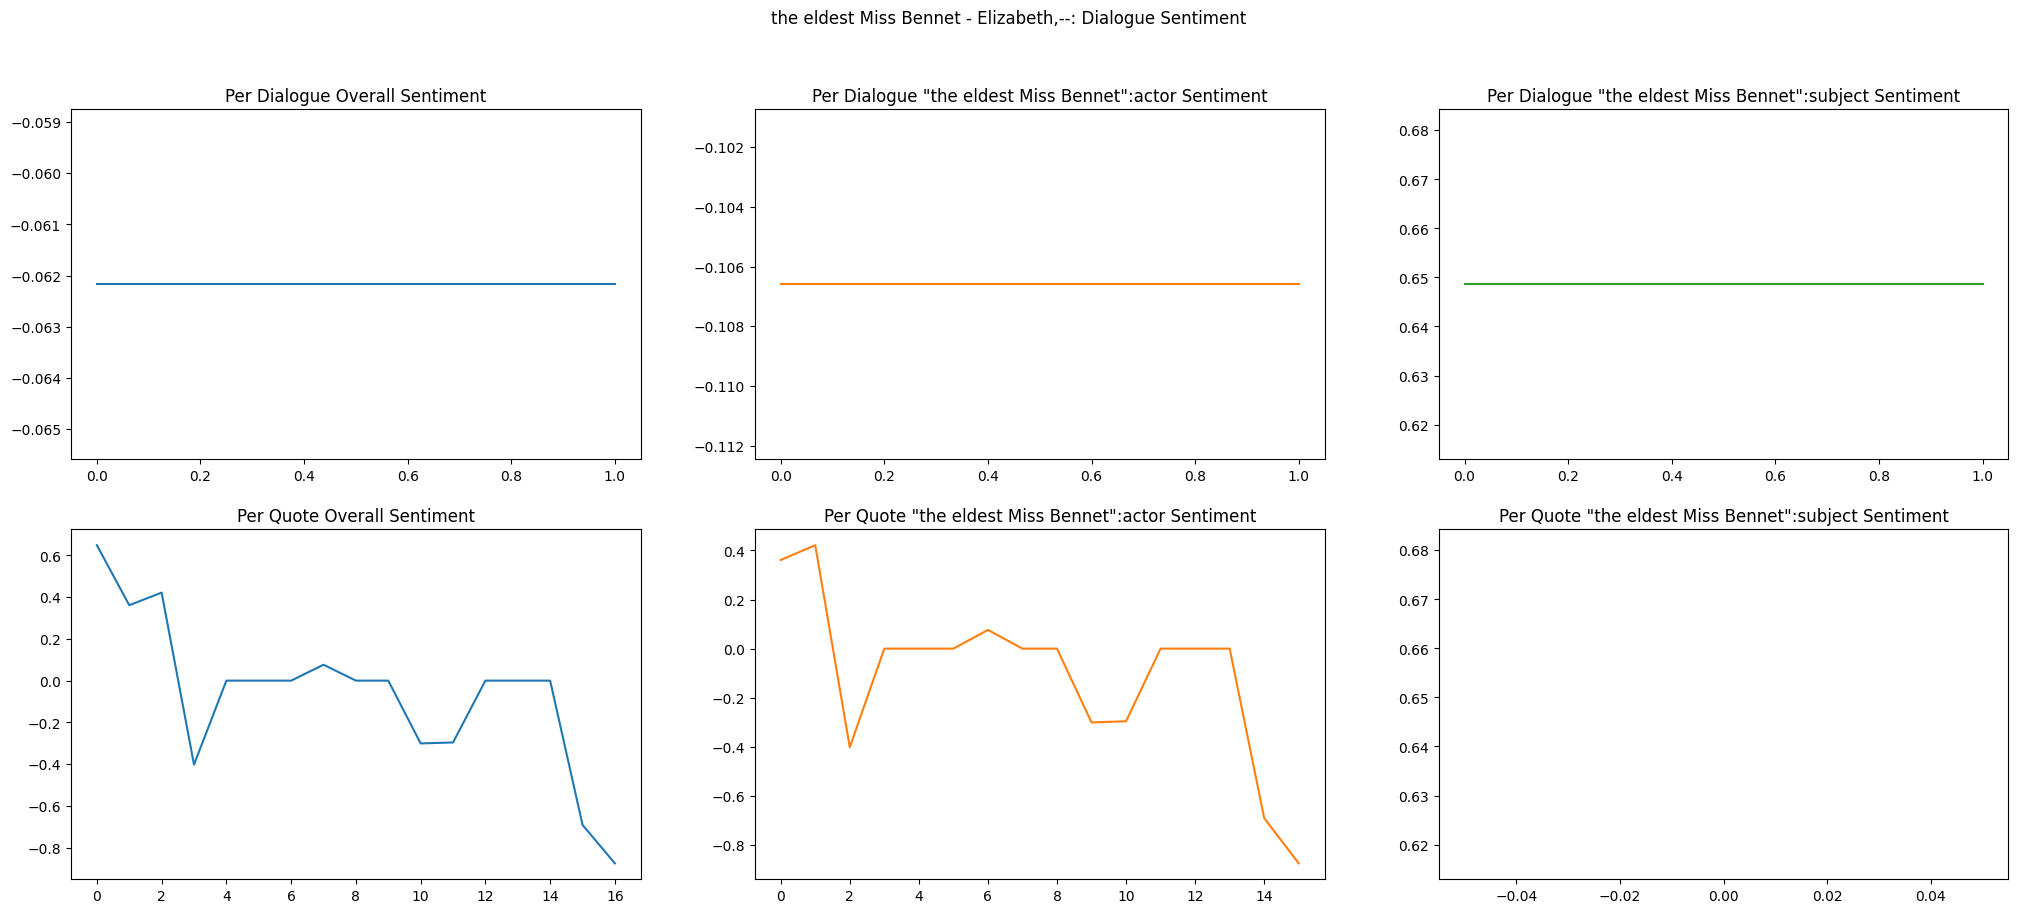

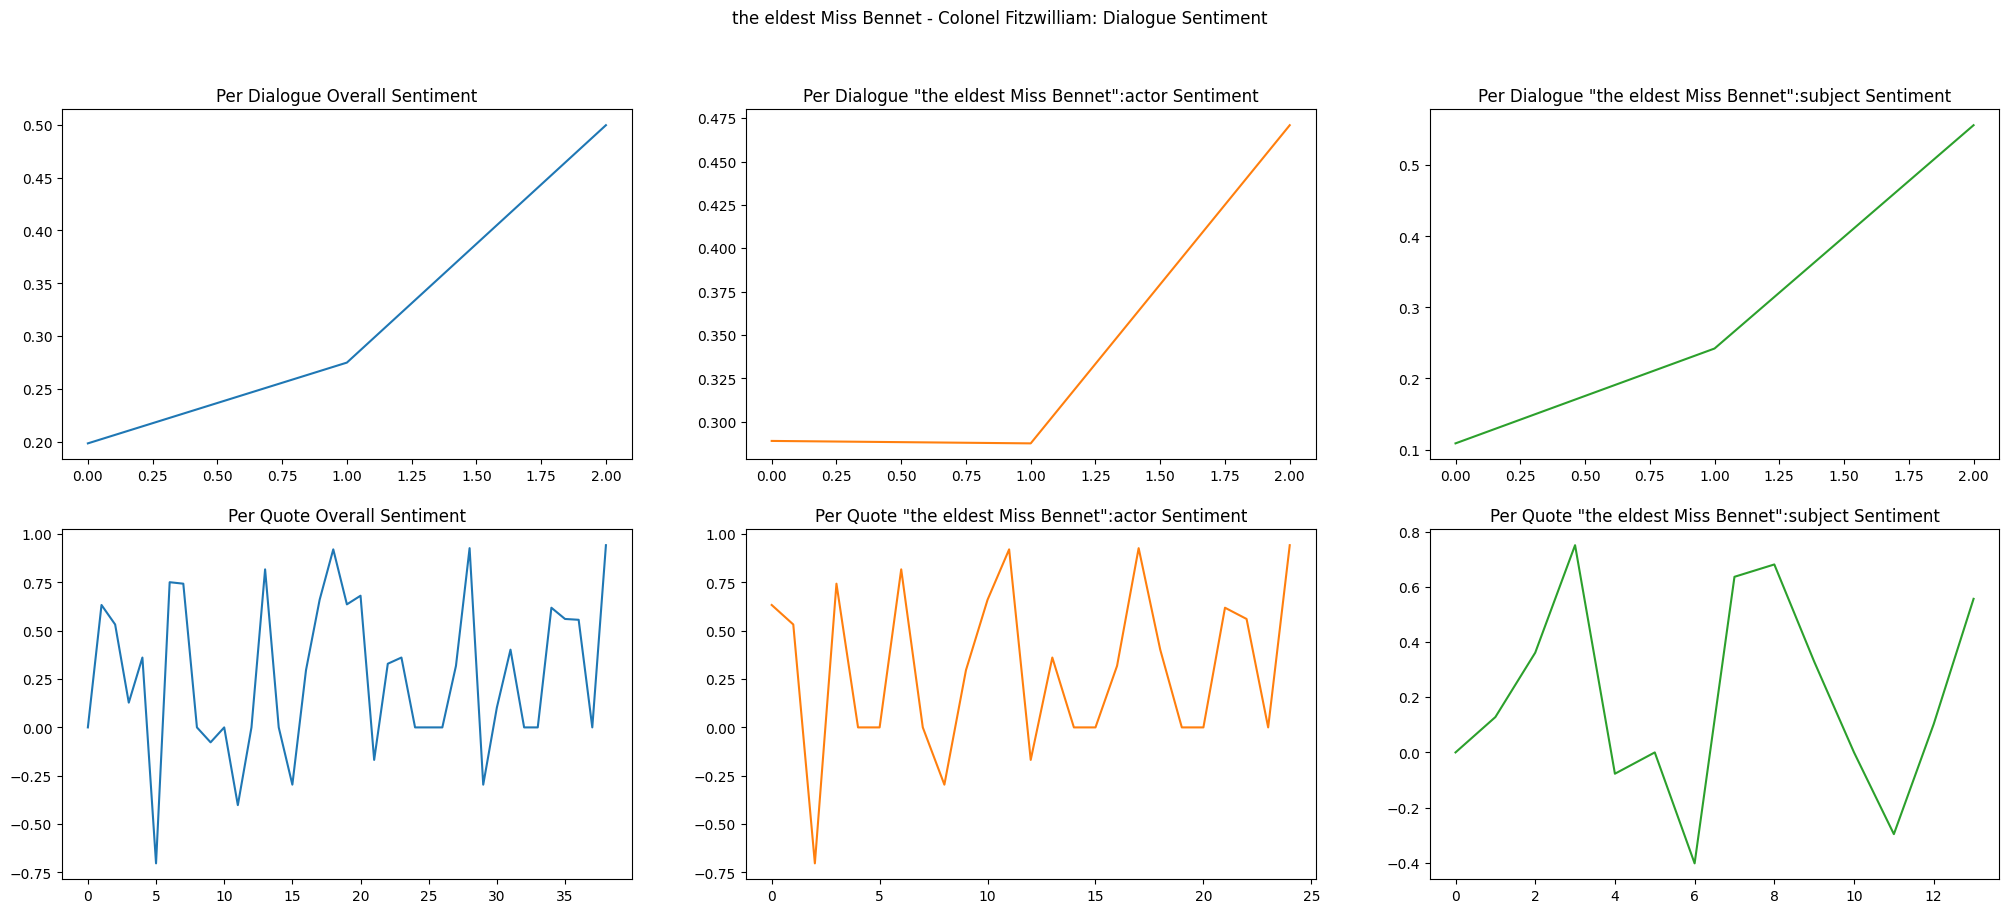

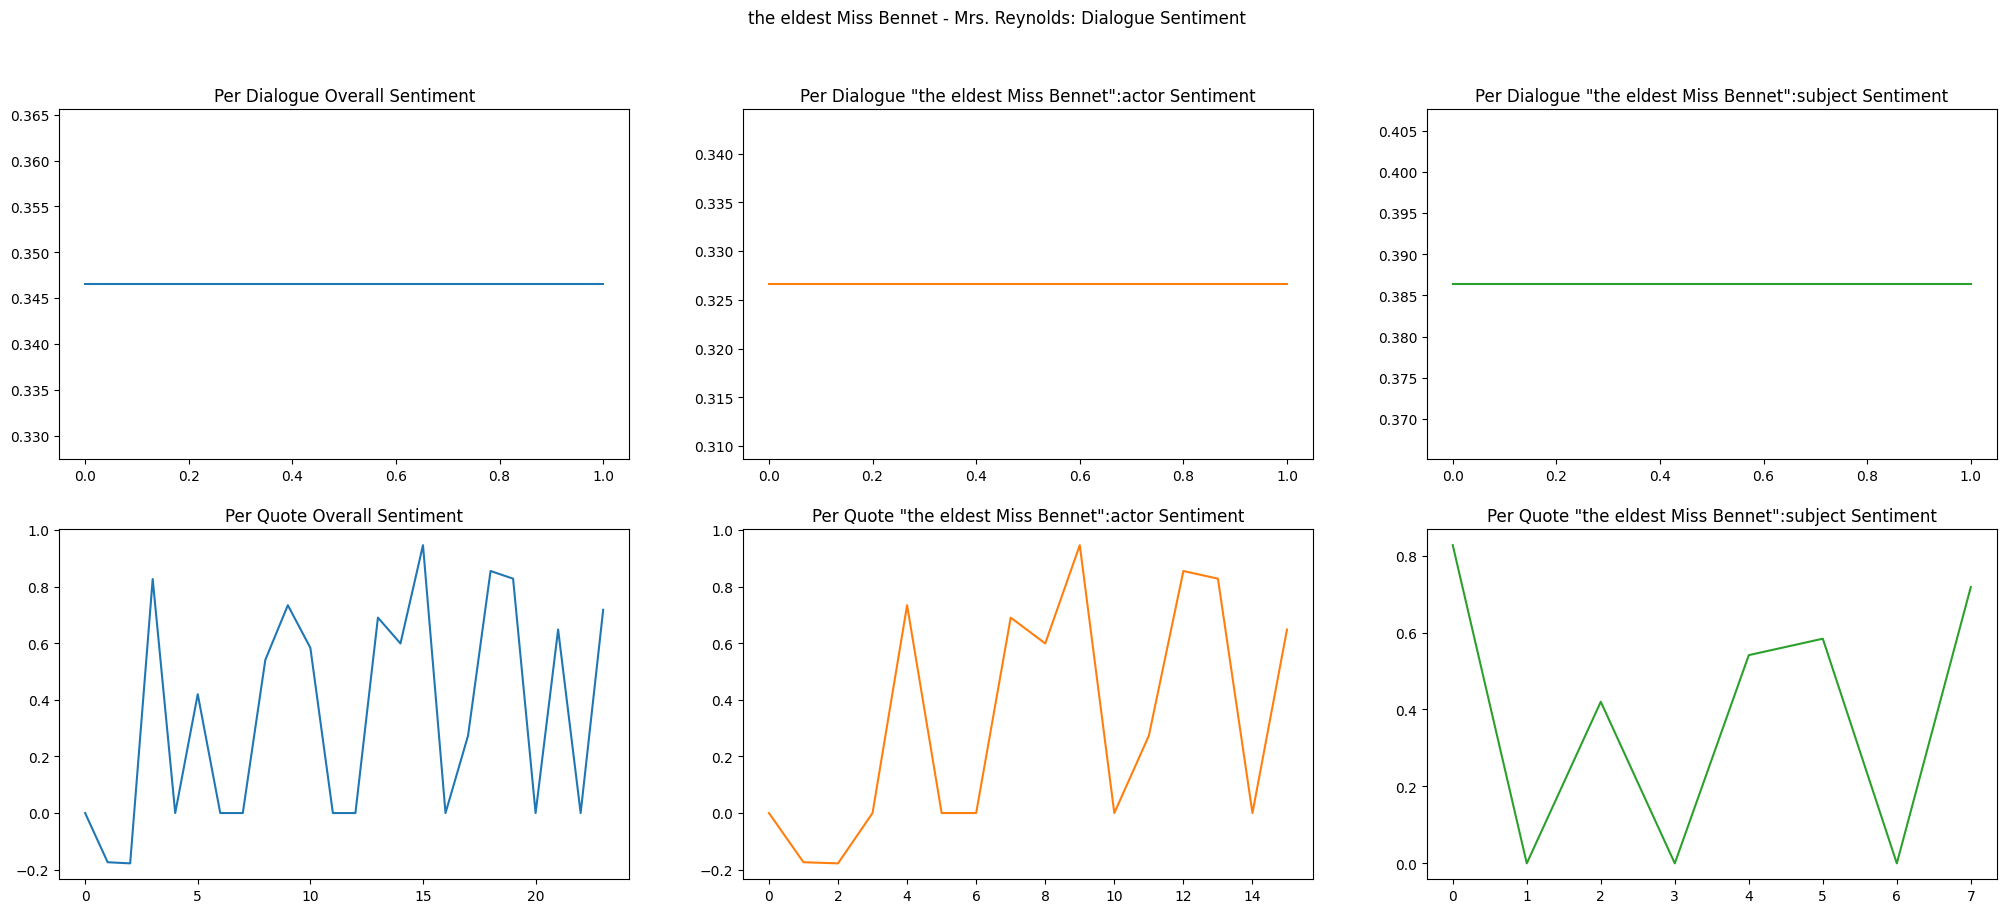

In [11]:
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


char_of_interest_id = char_id_lookup_reverse[character_of_interest]

sentiment_predictor = SentimentIntensityAnalyzer()

for character in filtered_other_characters:
    char_id = char_id_lookup_reverse[character]
    per_dialogue_overall_sentiment = []
    per_dialogue_coi_actor_sentiment = []
    per_dialogue_coi_subject_sentiment = []

    per_quote_overall_sentiment = []
    per_quote_coi_actor_sentiment = []
    per_quote_coi_subject_sentiment = []
    
    for dialogue in filtered_dialogues:
        if char_id not in dialogue.involved_characters:
            continue

        sent_overall = []
        sent_coi_actor = []
        sent_coi_subject = []

        for quote in dialogue.quotes:
            if not quote.speaker_id == char_id and not quote.speaker_id == char_of_interest_id:
                continue

            polarity = sentiment_predictor.polarity_scores(quote.text)['compound']
            sent_overall.append(polarity)
            if quote.speaker_id == char_id:
                sent_coi_subject.append(polarity)
            else:
                sent_coi_actor.append(polarity)

        per_dialogue_overall_sentiment.append(sum(sent_overall) / len(sent_overall))
        per_dialogue_coi_actor_sentiment.append(sum(sent_coi_actor) / len(sent_coi_actor))
        per_dialogue_coi_subject_sentiment.append(sum(sent_coi_subject) / len(sent_coi_subject))

        per_quote_overall_sentiment.extend(sent_overall)
        per_quote_coi_actor_sentiment.extend(sent_coi_actor)
        per_quote_coi_subject_sentiment.extend(sent_coi_subject)

    if len(per_dialogue_overall_sentiment) == 1:
        per_dialogue_overall_sentiment = 2 * per_dialogue_overall_sentiment
        per_dialogue_coi_actor_sentiment = 2 * per_dialogue_coi_actor_sentiment
        per_dialogue_coi_subject_sentiment = 2 * per_dialogue_coi_subject_sentiment
    
    fig, axs = plt.subplots(2, 3)
    fig.suptitle(f'{character_of_interest} - {character}: Dialogue Sentiment')

    axis = np.arange(len(per_dialogue_overall_sentiment))
    axs[0, 0].plot(axis, per_dialogue_overall_sentiment)
    axs[0, 0].set_title('Per Dialogue Overall Sentiment')

    axis = np.arange(len(per_dialogue_coi_actor_sentiment))
    axs[0, 1].plot(axis, per_dialogue_coi_actor_sentiment, 'tab:orange')
    axs[0, 1].set_title(f'Per Dialogue "{character_of_interest}":actor Sentiment')

    axis = np.arange(len(per_dialogue_coi_subject_sentiment))
    axs[0, 2].plot(axis, per_dialogue_coi_subject_sentiment, 'tab:green')
    axs[0, 2].set_title(f'Per Dialogue "{character_of_interest}":subject Sentiment')

    axis = np.arange(len(per_quote_overall_sentiment))
    axs[1, 0].plot(axis, per_quote_overall_sentiment)
    axs[1, 0].set_title('Per Quote Overall Sentiment')

    axis = np.arange(len(per_quote_coi_actor_sentiment))
    axs[1, 1].plot(axis, per_quote_coi_actor_sentiment, 'tab:orange')
    axs[1, 1].set_title(f'Per Quote "{character_of_interest}":actor Sentiment')

    axis = np.arange(len(per_quote_coi_subject_sentiment))
    axs[1, 2].plot(axis, per_quote_coi_subject_sentiment, 'tab:green')
    axs[1, 2].set_title(f'Per Quote "{character_of_interest}":subject Sentiment')
    
    plt.show()

In [12]:
per_dialogue_overall_sentiment

[0.34652083333333333, 0.34652083333333333]

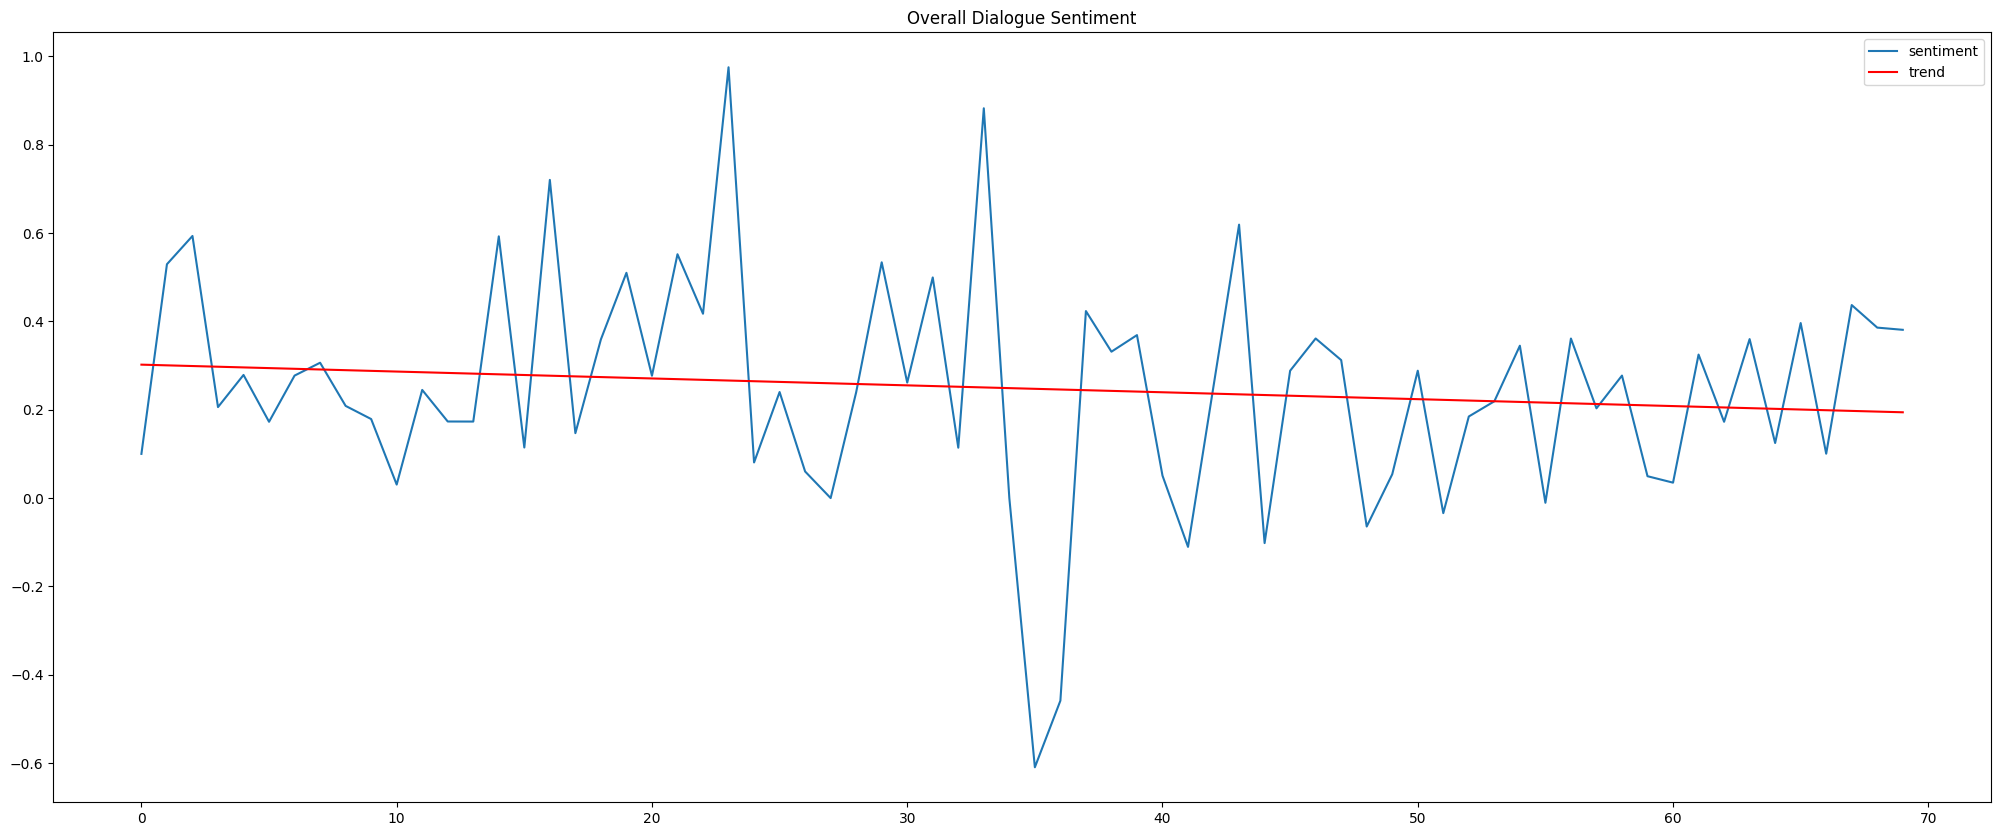

In [14]:
dialogue_sentiments = []

for dialogue in filtered_dialogues:
    sentiments = []
    for quote in dialogue.quotes:
        polarity = sentiment_predictor.polarity_scores(quote.text)['compound']
        sentiments.append(polarity)
    dialogue_sentiments.append(sum(sentiments) / len(sentiments))

x = np.arange(len(dialogue_sentiments))
slope, intercept = np.polyfit(x, dialogue_sentiments, 1)

plt.plot(x, dialogue_sentiments, label='sentiment')
plt.plot(x, slope*x + intercept, color='red', label='trend')
plt.title('Overall Dialogue Sentiment')
plt.legend()
plt.show()